In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("loan.csv")

C:\Users\ankit\AppData\Local\Temp\ipykernel_2272\2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [115]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [116]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [117]:
df.size

4408587

In [118]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data Cleaning

In [119]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print(column, " - ", df[column].isnull().sum(), " - ", df[column].dtypes)

emp_title  -  2459  -  object
emp_length  -  1075  -  object
desc  -  12942  -  object
title  -  11  -  object
mths_since_last_delinq  -  25682  -  float64
mths_since_last_record  -  36931  -  float64
revol_util  -  50  -  object
last_pymnt_d  -  71  -  object
next_pymnt_d  -  38577  -  object
last_credit_pull_d  -  2  -  object
collections_12_mths_ex_med  -  56  -  float64
mths_since_last_major_derog  -  39717  -  float64
annual_inc_joint  -  39717  -  float64
dti_joint  -  39717  -  float64
verification_status_joint  -  39717  -  float64
tot_coll_amt  -  39717  -  float64
tot_cur_bal  -  39717  -  float64
open_acc_6m  -  39717  -  float64
open_il_6m  -  39717  -  float64
open_il_12m  -  39717  -  float64
open_il_24m  -  39717  -  float64
mths_since_rcnt_il  -  39717  -  float64
total_bal_il  -  39717  -  float64
il_util  -  39717  -  float64
open_rv_12m  -  39717  -  float64
open_rv_24m  -  39717  -  float64
max_bal_bc  -  39717  -  float64
all_util  -  39717  -  float64
total_rev_hi

In [120]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print(column, " - ", df[column].isnull().sum(), " - ", df[column].dtypes)

emp_title  -  2459  -  object
emp_length  -  1075  -  object
desc  -  12942  -  object
title  -  11  -  object
mths_since_last_delinq  -  25682  -  float64
mths_since_last_record  -  36931  -  float64
revol_util  -  50  -  object
last_pymnt_d  -  71  -  object
next_pymnt_d  -  38577  -  object
last_credit_pull_d  -  2  -  object
collections_12_mths_ex_med  -  56  -  float64
mths_since_last_major_derog  -  39717  -  float64
annual_inc_joint  -  39717  -  float64
dti_joint  -  39717  -  float64
verification_status_joint  -  39717  -  float64
tot_coll_amt  -  39717  -  float64
tot_cur_bal  -  39717  -  float64
open_acc_6m  -  39717  -  float64
open_il_6m  -  39717  -  float64
open_il_12m  -  39717  -  float64
open_il_24m  -  39717  -  float64
mths_since_rcnt_il  -  39717  -  float64
total_bal_il  -  39717  -  float64
il_util  -  39717  -  float64
open_rv_12m  -  39717  -  float64
open_rv_24m  -  39717  -  float64
max_bal_bc  -  39717  -  float64
all_util  -  39717  -  float64
total_rev_hi

## Lets check unique values of Categorical Columns

In [121]:
categorical_columns = ["emp_title", "emp_length", "desc", "title", "revol_util", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d"]

In [122]:
for category in categorical_columns:
    print("category===>",category)
    print(df[category].unique(), " - ", df[category].unique().size, "\n")

category===> emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']  -  28821 

category===> emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]  -  12 

category===> desc
['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>'
 nan ...
 'O

In [124]:
for category in categorical_columns:
    print("category====>")
    print(df[category].value_counts(), "\n", df[category].isnull().sum(), "\n")

category====>
emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64 
 2459 

category====>
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64 
 1075 

category====>
desc
                                                                                                                                                                                                      

#### From above analysis on categorical columns, to replace null values or delete its row we can achieve it as below

- emp_title has 28821 unique values so replacing it with mode value will not be beneficial, its better to drop these rows since as a banker I am not assured if this person will repay or not. But before deleting lets cross check the loan status for the same
- For emp_length since unique values are only 12, we will replace null values with the mode.
- For null desc we will leave it as is, since this is more like extra column and not a category column
- For title as well we will leave the column as is, since this is more like extra column and not a category column
- revol_util can be modified as numerical column, and null values of it can be replaced by median
- last_pymnt_d, next_pymnt_d, last_credit_pull_d are date columns

In [125]:
df[df.emp_title.isnull()]["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

So since we have valid loan status for all emp_title that corresponds to null title, lets introduce a new category as Unknown

In [126]:
df["emp_title"].fillna("Unknown", inplace=True)

In [127]:
emp_lenth_mode = df["emp_length"].mode()[0]
df["emp_length"].fillna(emp_lenth_mode, inplace=True)

In [128]:
df['emp_length'] = pd.Categorical(df['emp_length'], categories=df["emp_length"].unique(), ordered=True)

In [129]:
df["revol_util"] = df["revol_util"].apply(lambda x: float(x[:-1]) if pd.notnull(x) else np.nan)

In [130]:
revol_util_median = df["revol_util"].median()
df["revol_util"].fillna(revol_util_median, inplace=True)

In [131]:
df["last_pymnt_date"] = pd.to_datetime(df["last_pymnt_d"], format="%b-%y", errors="coerce")
df["next_pymnt_date"] = pd.to_datetime(df["next_pymnt_d"], format="%b-%y", errors="coerce")
df["last_credit_pull_date"] = pd.to_datetime(df["last_credit_pull_d"], format="%b-%y", errors="coerce")

In [132]:
df.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
                                   ...      
total_bc_limit                       float64
total_il_high_credit_limit           float64
last_pymnt_date               datetime64[ns]
next_pymnt_date               datetime64[ns]
last_credit_pull_date         datetime64[ns]
Length: 114, dtype: object

#### Resolving null for Numerical Columns

In [133]:
numerical_columns = ["mths_since_last_delinq", "mths_since_last_record", "collections_12_mths_ex_med", "mths_since_last_major_derog", "annual_inc_joint", "dti_joint", "verification_status_joint", "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "chargeoff_within_12_mths", "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc", "mths_since_recent_bc", "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq", "num_accts_ever_120_pd", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "num_sats", 
"num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m", "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies", "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit"]

##### Updating null values to median

In [134]:
for numerical in numerical_columns:
    numerical_median = df[numerical].median()
    df[numerical].fillna(numerical_median, inplace=True)

##### Debugging to see why all null values ae not getting updated to median

In [135]:
for numerical in numerical_columns:
    if numerical in df.columns:
        print(f"Processing column: {numerical}")
        numerical_median = df[numerical].median()
        print(f"Median of {numerical}: {numerical_median}")

        # If the median is NaN, print a warning
        if pd.isna(numerical_median):
            print(f"Warning: Median of {numerical} is NaN. Skipping this column.")
        else:
            df[numerical].fillna(numerical_median, inplace=True)
        
        # Verify if the null values were filled
        print(f"Remaining NaNs in {numerical} after filling: {df[numerical].isnull().sum()}")
    else:
        print(f"Column {numerical} does not exist in the DataFrame.")

Processing column: mths_since_last_delinq
Median of mths_since_last_delinq: 34.0
Remaining NaNs in mths_since_last_delinq after filling: 0
Processing column: mths_since_last_record
Median of mths_since_last_record: 90.0
Remaining NaNs in mths_since_last_record after filling: 0
Processing column: collections_12_mths_ex_med
Median of collections_12_mths_ex_med: 0.0
Remaining NaNs in collections_12_mths_ex_med after filling: 0
Processing column: mths_since_last_major_derog
Median of mths_since_last_major_derog: nan
Remaining NaNs in mths_since_last_major_derog after filling: 39717
Processing column: annual_inc_joint
Median of annual_inc_joint: nan
Remaining NaNs in annual_inc_joint after filling: 39717
Processing column: dti_joint
Median of dti_joint: nan
Remaining NaNs in dti_joint after filling: 39717
Processing column: verification_status_joint
Median of verification_status_joint: nan
Remaining NaNs in verification_status_joint after filling: 39717
Processing column: tot_coll_amt
Media

In [136]:
for column in df.columns:
    nan_cotribution = (df[column].isnull().sum() / df.size) * 100
    if nan_cotribution < 0.8 :
        print(column, " - ", df[column].isnull().sum(), " - ", df[column].dtypes, " - ", (df[column].isnull().sum() / df.size) * 100)

id  -  0  -  int64  -  0.0
member_id  -  0  -  int64  -  0.0
loan_amnt  -  0  -  int64  -  0.0
funded_amnt  -  0  -  int64  -  0.0
funded_amnt_inv  -  0  -  float64  -  0.0
term  -  0  -  object  -  0.0
int_rate  -  0  -  object  -  0.0
installment  -  0  -  float64  -  0.0
grade  -  0  -  object  -  0.0
sub_grade  -  0  -  object  -  0.0
emp_title  -  0  -  object  -  0.0
emp_length  -  0  -  category  -  0.0
home_ownership  -  0  -  object  -  0.0
annual_inc  -  0  -  float64  -  0.0
verification_status  -  0  -  object  -  0.0
issue_d  -  0  -  object  -  0.0
loan_status  -  0  -  object  -  0.0
pymnt_plan  -  0  -  object  -  0.0
url  -  0  -  object  -  0.0
desc  -  12942  -  object  -  0.28583809398865395
purpose  -  0  -  object  -  0.0
title  -  11  -  object  -  0.0002429469196318338
zip_code  -  0  -  object  -  0.0
addr_state  -  0  -  object  -  0.0
dti  -  0  -  float64  -  0.0
delinq_2yrs  -  0  -  int64  -  0.0
earliest_cr_line  -  0  -  object  -  0.0
inq_last_6mths  - 

In [137]:
# Changing object to float
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1]))

## Usable Column after Data Cleaning

- id           -  A unique LC assigned ID for the loan listing.
- member_id    -  A unique LC assigned Id for the borrower member.
- loan_amnt    -  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department 
                reduces the loan amount, then it will be reflected in this value.
- funded_amnt  - The total amount committed to that loan at that point in time.
- funded_amnt_inv  - The total amount committed by investors for that loan at that point in time.
- term         - The number of payments on the loan. Values are in months and can be either 36 or 60.  
- int_rate  - Interest Rate on the loan
- installment  - The monthly payment owed by the borrower if the loan originates.
- grade  -  LC assigned loan grade
- sub_grade  -  LC assigned loan subgrade
- emp_title  -  The job title supplied by the Borrower when applying for the loan.*
- emp_length  -  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- home_ownership  - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
- annual_inc  -  The self-reported annual income provided by the borrower during registration.
- verification_status  -  Indicates if income was verified by LC, not verified, or if the income source was verified
- issue_d  -  The month which the loan was funded (Create a date column for this)
- loan_status  -  Current status of the loan
- pymnt_plan  -  Indicates if a payment plan has been put in place for the loan
- url  -  URL for the LC page with listing data.
- desc  -  Loan description provided by the borrower
- purpose  -  A category provided by the borrower for the loan request. 
- title  -  The loan title provided by the borrower
- zip_code  -  The first 3 numbers of the zip code provided by the borrower in the loan application.
- addr_state  -  The state provided by the borrower in the loan application
- dti  -  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- delinq_2yrs  -  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- earliest_cr_line  -  The month the borrower's earliest reported credit line was opened
- inq_last_6mths  -  The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- mths_since_last_delinq  -  The number of months since the borrower's last delinquency.
- mths_since_last_record  -  The number of months since the last public record.
- open_acc  -  The number of open credit lines in the borrower's credit file.
- pub_rec  -  Number of derogatory public records
- revol_bal  -  Total credit revolving balance
- revol_util  -  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc  - The total number of credit lines currently in the borrower's credit file  
- initial_list_status  - The initial listing status of the loan. Possible values are – W, F 
- out_prncp  -  Remaining outstanding principal for total amount funded
- out_prncp_inv  -  Remaining outstanding principal for portion of total amount funded by investors
- total_pymnt  -  Payments received to date for total amount funded
- total_pymnt_inv  -  Payments received to date for portion of total amount funded by investors
- total_rec_prncp  -  Principal received to date
- total_rec_int  -  Interest received to date
- total_rec_late_fee  -  Late fees received to date
- recoveries  -  post charge off gross recovery
- collection_recovery_fee  -  post charge off collection fee
- last_pymnt_amnt  -  Last total payment amount received
- collections_12_mths_ex_med  -  Number of collections in 12 months excluding medical collections
- policy_code  -  publicly available policy_code=1 <br>
                  new products not publicly available policy_code=2
- application_type  -  Indicates whether the loan is an individual application or a joint application with two co-borrowers
- acc_now_delinq  -  The number of accounts on which the borrower is now delinquent.
- chargeoff_within_12_mths  -  Number of charge-offs within 12 months
- delinq_amnt  -  The past-due amount owed for the accounts on which the borrower is now delinquent.
- pub_rec_bankruptcies  -  Number of public record bankruptcies
- tax_liens  -  Number of tax liens
- last_pymnt_date  -  Last month payment was received
- last_credit_pull_date  -  The most recent month LC pulled credit for this loan

In [138]:
df["issue_date"] = pd.to_datetime(df["issue_d"], format="%b-%y", errors="coerce")

#### Segregating category, numerical and extra columns

In [139]:
categorical_columns = ["term", "grade", "sub_grade",  "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "addr_state"]
numerical_columns = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq", "mths_since_last_record", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "collections_12_mths_ex_med", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "pub_rec_bankruptcies", "tax_liens"]
extra_columns = ["id", "member_id", "issue_date", "url", "desc", "earliest_cr_line", "policy_code", "last_pymnt_date", "last_credit_pull_date", "emp_title", "pymnt_plan", "title", "zip_code", "initial_list_status", "application_type"]

# Univariate Analysis

### Category Univariate Analysis

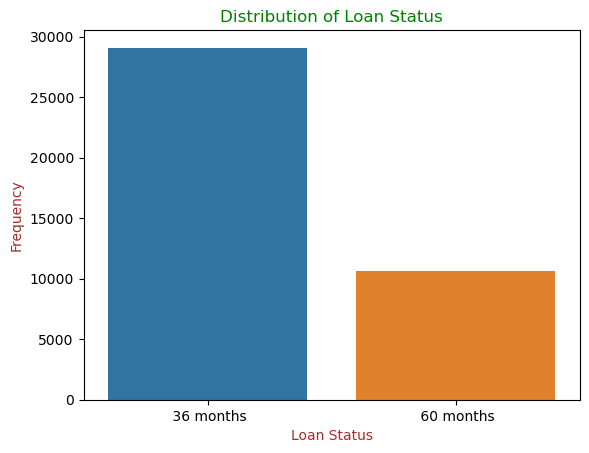

In [223]:
term_counts = df.term.value_counts()
plt.bar(term_counts.index, term_counts.values)

plt.title("Distribution of Loan Term", color="green")
plt.xlabel("Term", color="brown")
plt.ylabel("Frequency", color="brown")

plt.show()

### Loan Term is more likely to be 36 months

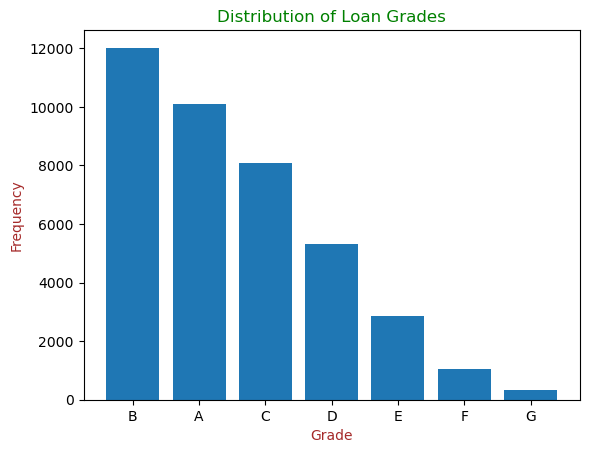

In [38]:
grade_counts = df.grade.value_counts()
plt.bar(grade_counts.index, grade_counts.values)

# Adding titles and labels
plt.title("Distribution of Loan Grades", color="green")
plt.xlabel("Grade", color="brown")
plt.ylabel("Frequency", color="brown")

plt.show()

### Loan Grade - B is most likely alloted by Loan Department, followed by A and C

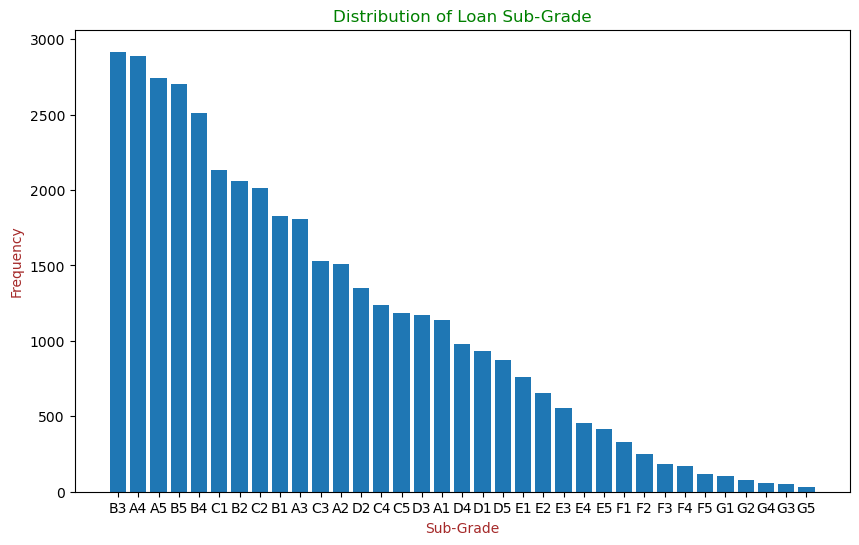

In [39]:
sub_grade_counts = df.sub_grade.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(sub_grade_counts.index, sub_grade_counts.values)

plt.title("Distribution of Loan Sub-Grade", color="green")
plt.xlabel("Sub-Grade", color="brown")
plt.ylabel("Frequency", color="brown")

plt.show()

### Top Loan Sub Grades are B3 and A4

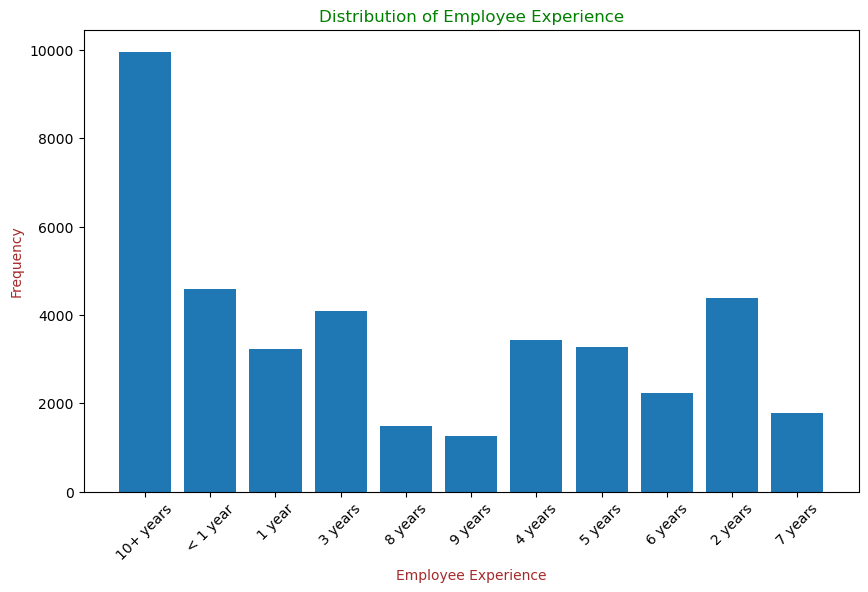

In [40]:
emp_length_counts = df.emp_length.value_counts().sort_index()
plt.rcParams["font.family"] = "DejaVu Sans"
plt.figure(figsize=(10, 6))
plt.bar(emp_length_counts.index, emp_length_counts.values)

plt.title("Distribution of Employee Experience", color="green")
plt.xlabel("Employee Experience", color="brown")
plt.ylabel("Frequency", color="brown")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

### Employee with experience of 10+ years most likely file for loan

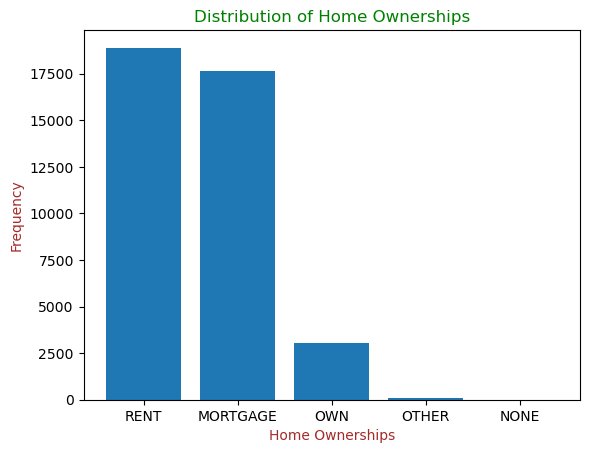

In [49]:
home_ownership_counts = df.home_ownership.value_counts()
plt.bar(home_ownership_counts.index, home_ownership_counts.values)

plt.title("Distribution of Home Ownerships", color="green")
plt.xlabel("Home Ownerships", color="brown")
plt.ylabel("Frequency", color="brown")

plt.show()

### People whose home ownership are RENT or MORTGAGE are most likely to apply for a loan

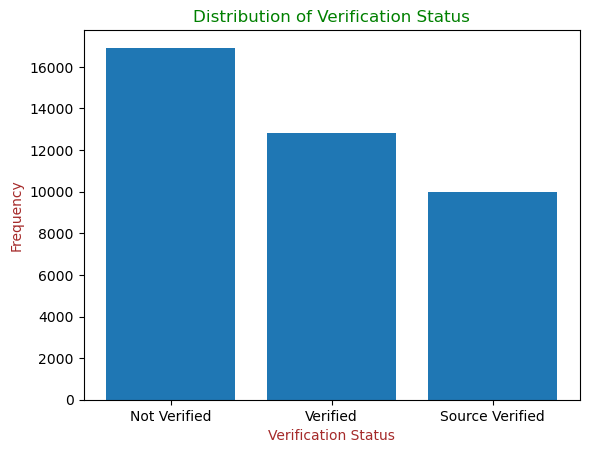

In [48]:
verification_status_counts = df.verification_status.value_counts()
plt.bar(verification_status_counts.index, verification_status_counts.values)

plt.title("Distribution of Verification Status", color="green")
plt.xlabel("Verification Status", color="brown")
plt.ylabel("Frequency", color="brown")

plt.show()

### Out of the application received majority of incomes are Not Verified followed by Verified and Source Verified

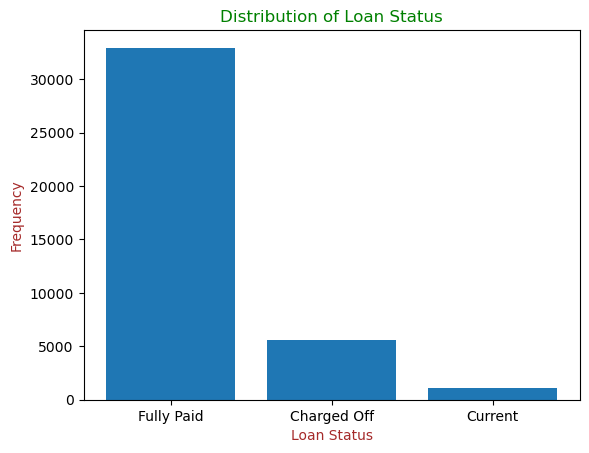

In [47]:
loan_status_counts = df.loan_status.value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)

# Adding titles and labels
plt.title("Distribution of Loan Status", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Frequency", color="brown")

plt.show()

- Most of the people who took loan have fully paid it
- People between 5000 to 10000 are Charged off
- And very less people i.e less than 5000 loan accounts are active

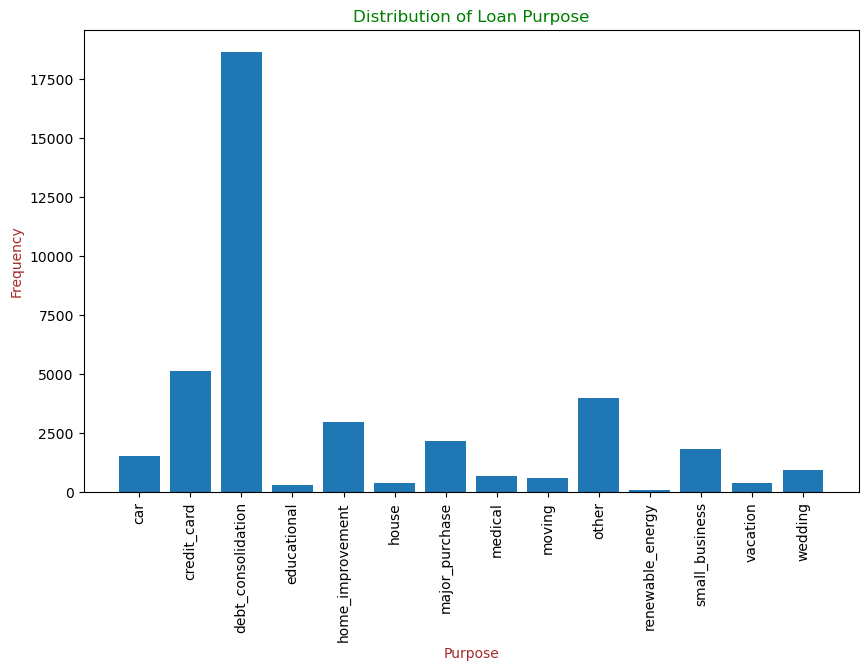

In [197]:
purpose_counts = df.purpose.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(purpose_counts.index, purpose_counts.values)

# Adding titles and labels
plt.title("Distribution of Loan Purpose", color="green")
plt.xlabel("Purpose", color="brown")
plt.ylabel("Frequency", color="brown")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### Normaly people take loan for debt_consolidation purpose

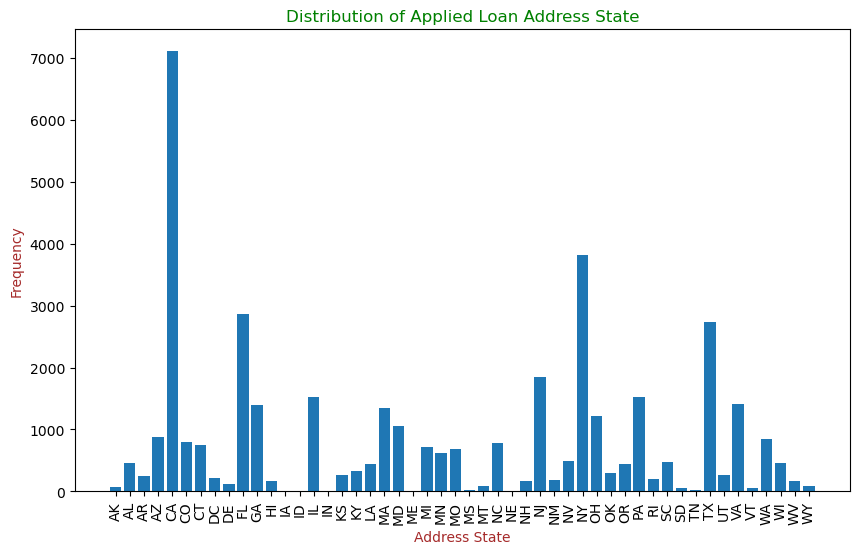

In [60]:
addr_state_counts = df.addr_state.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(addr_state_counts.index, addr_state_counts.values)

# Adding titles and labels
plt.title('Distribution of Applied Loan Address State', color="green")
plt.xlabel('Address State', color="brown")
plt.ylabel('Frequency', color="brown")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### Most Peoples applied loan from state CA

# Numerical Univariate Analysis

In [72]:
essential_numerical_columns = [
    "loan_amnt", "funded_amnt", "installment", "annual_inc",
    "dti", "delinq_2yrs", "revol_bal", "revol_util", "total_pymnt",
    "total_rec_prncp", "total_rec_int", "last_pymnt_amnt"
]

contextual_numerical_columns = [
    "funded_amnt_inv", "mths_since_last_delinq", "open_acc", "total_acc",
    "out_prncp", "out_prncp_inv", "total_pymnt_inv", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "acc_now_delinq", "pub_rec",
    "pub_rec_bankruptcies", "tax_liens", "inq_last_6mths"
]

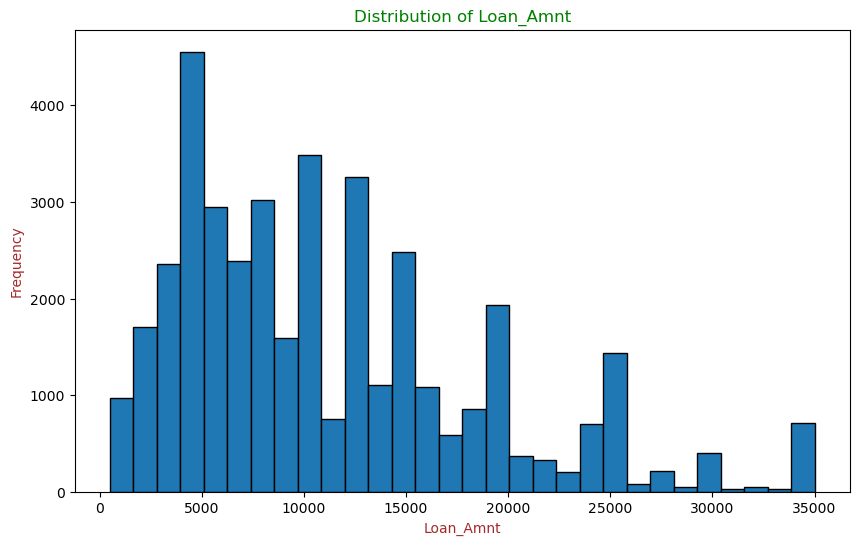

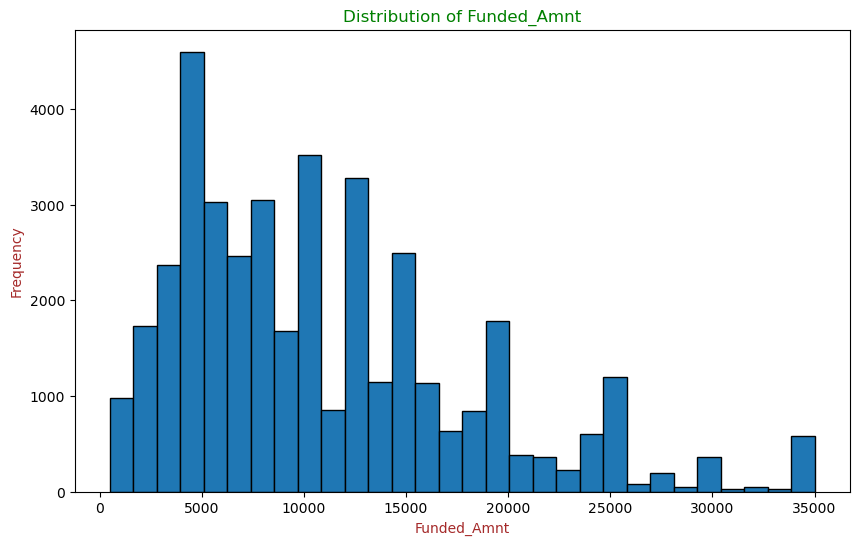

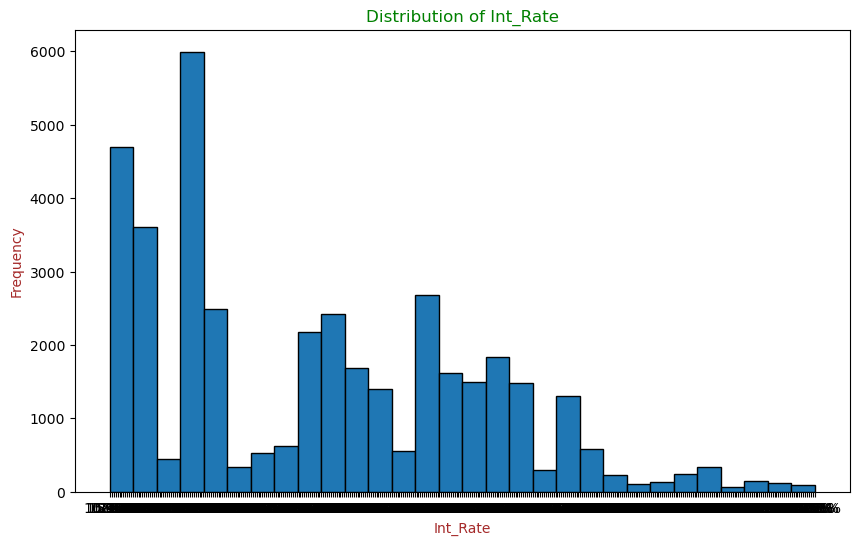

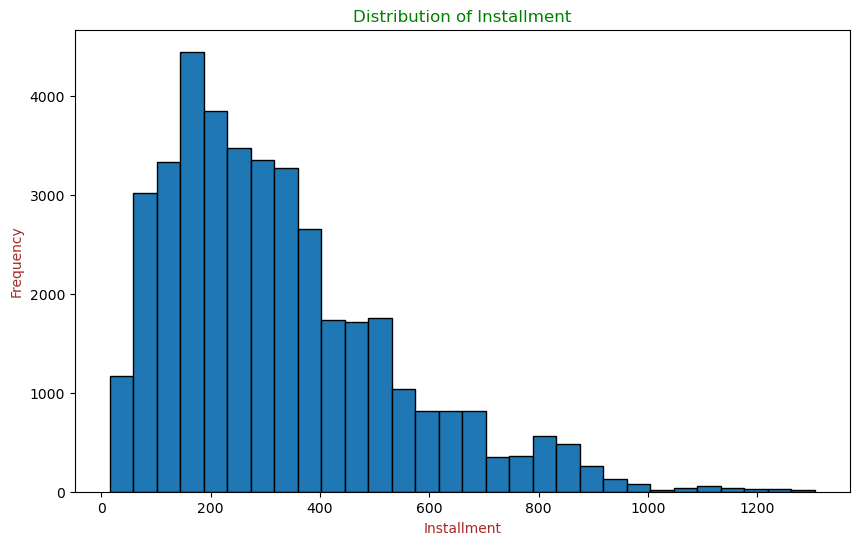

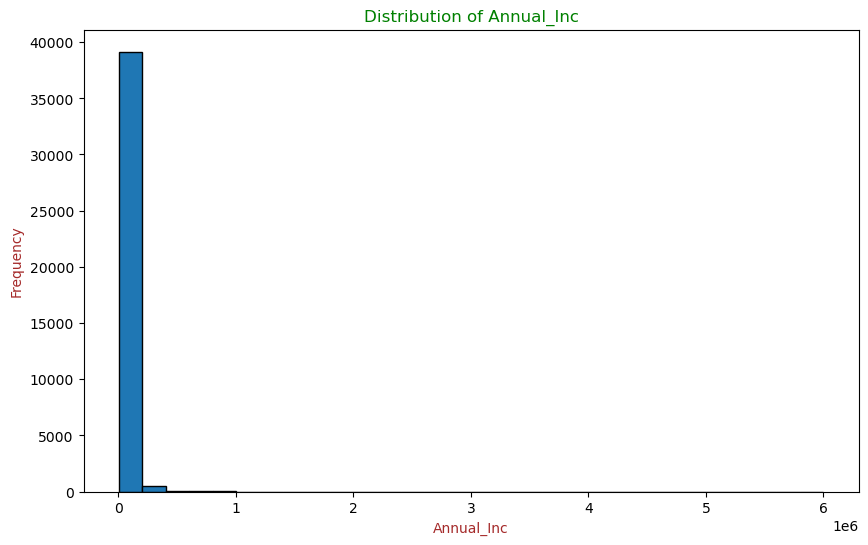

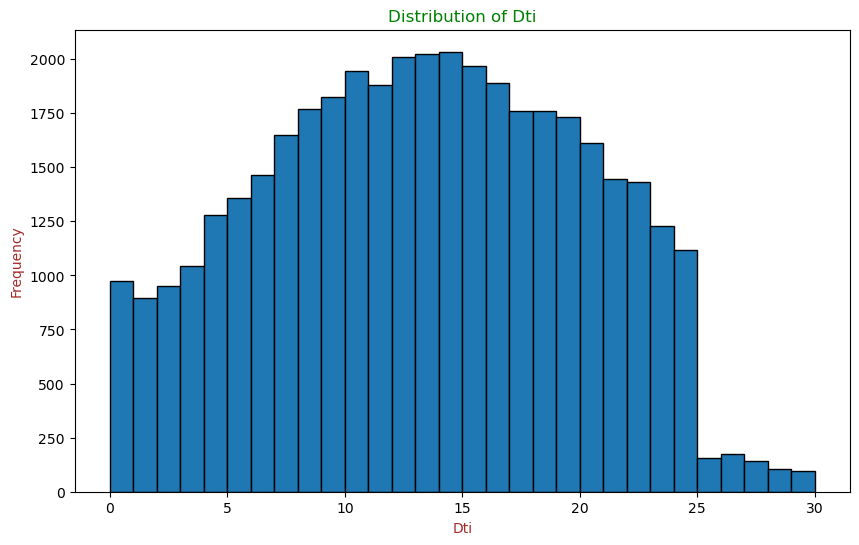

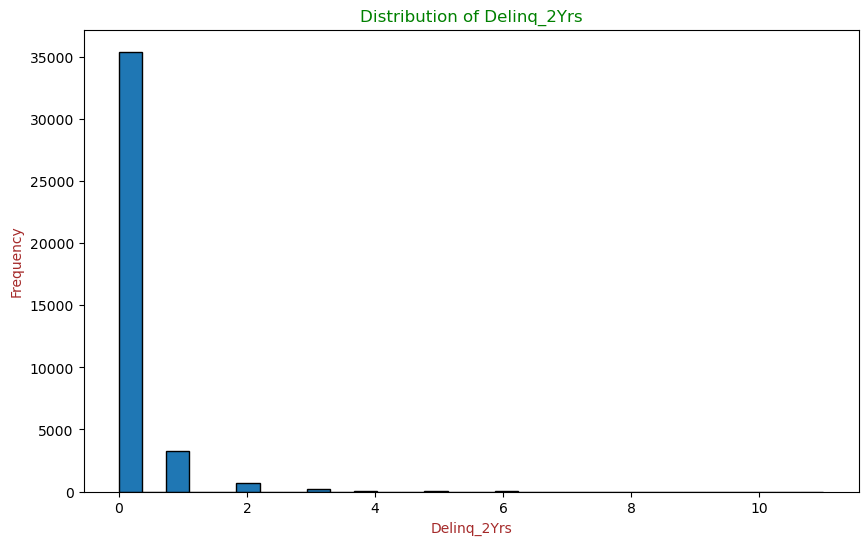

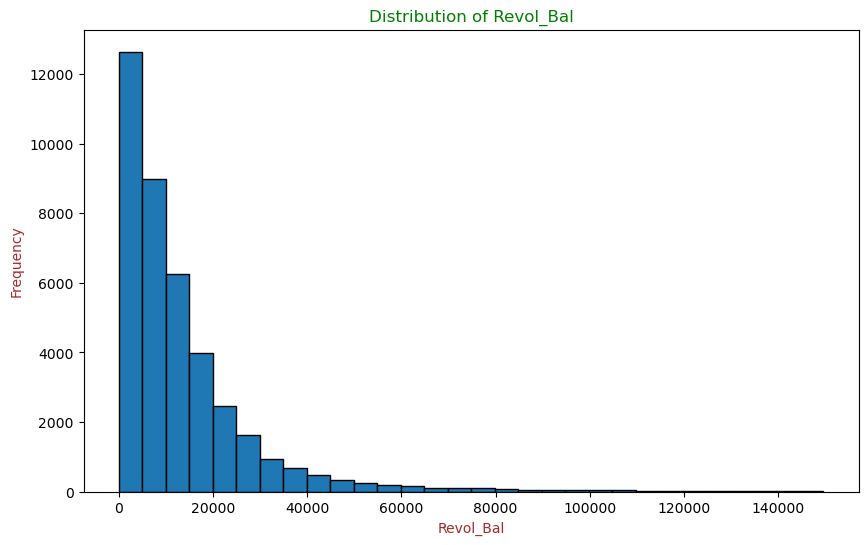

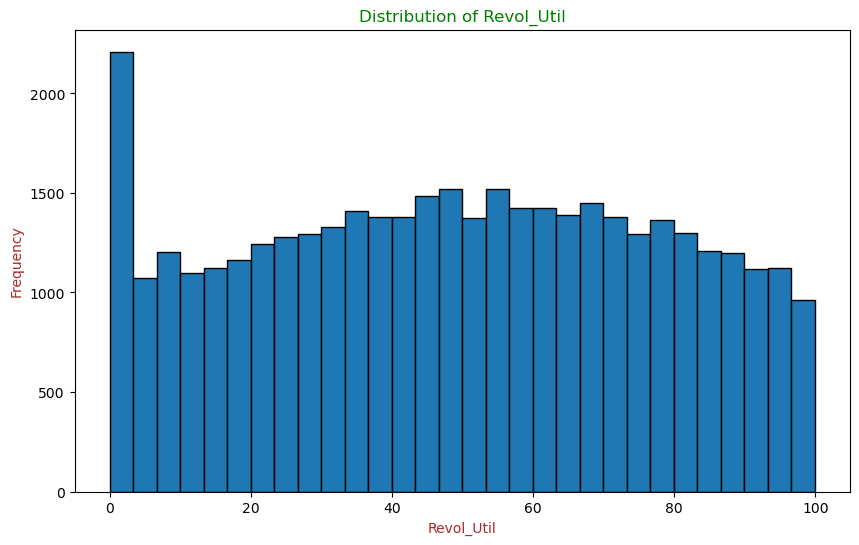

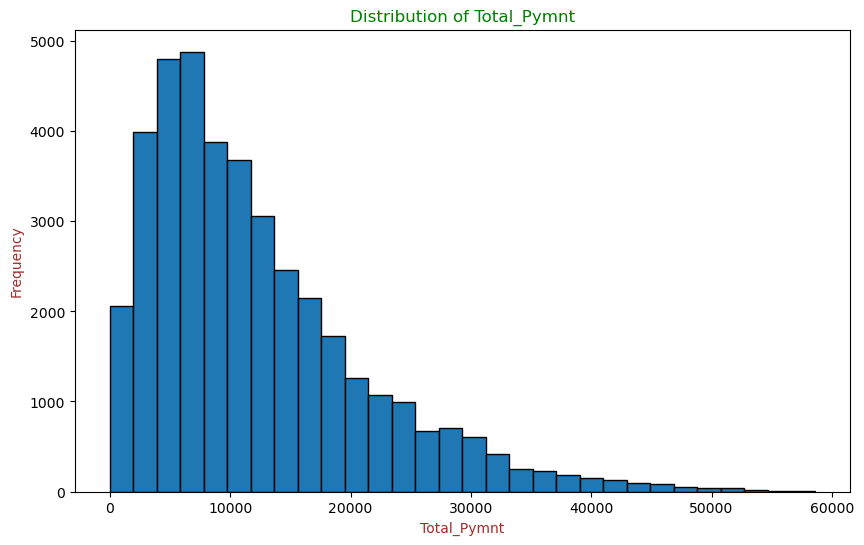

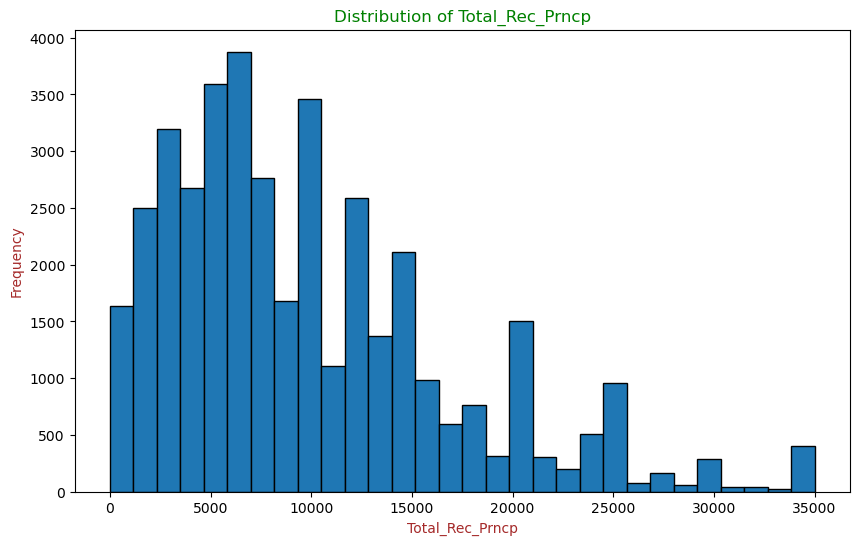

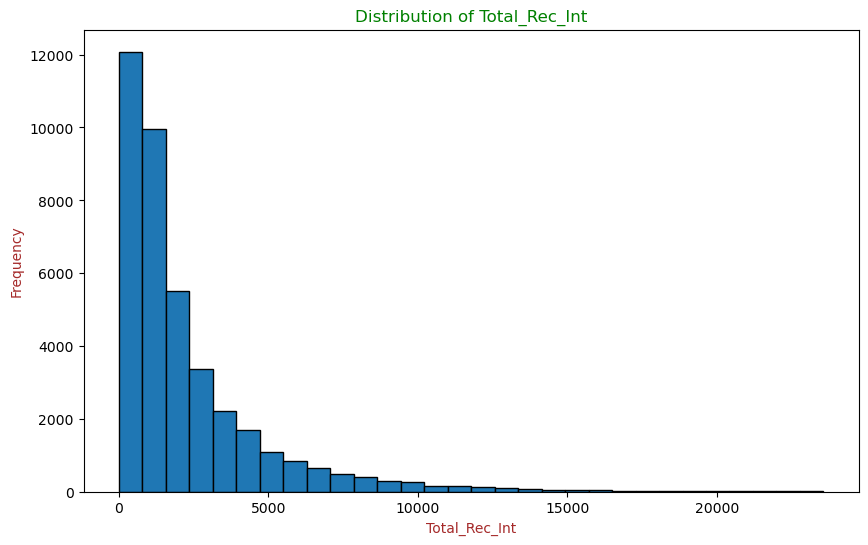

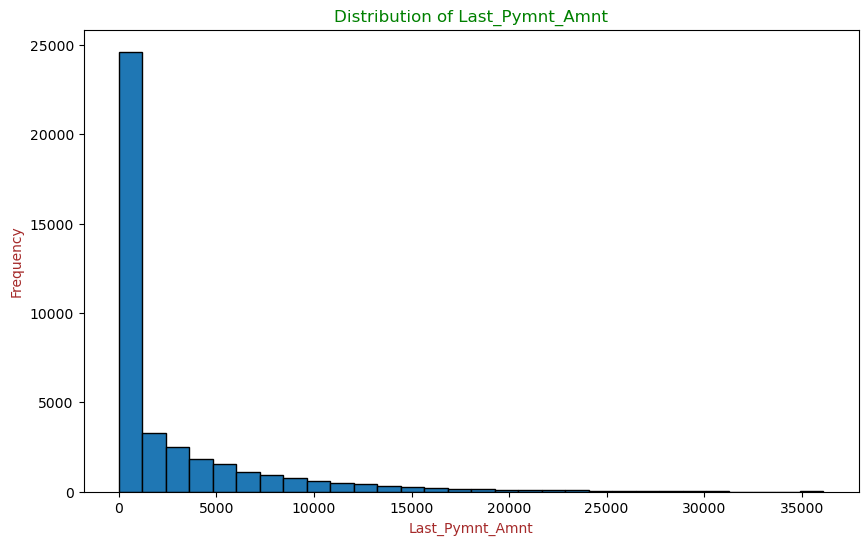

In [69]:
for column in essential_numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='black')

    plt.title(f"Distribution of {column.title()}", color="green")
    plt.xlabel(column.title(), color="brown")
    plt.ylabel("Frequency", color="brown")

    plt.show()

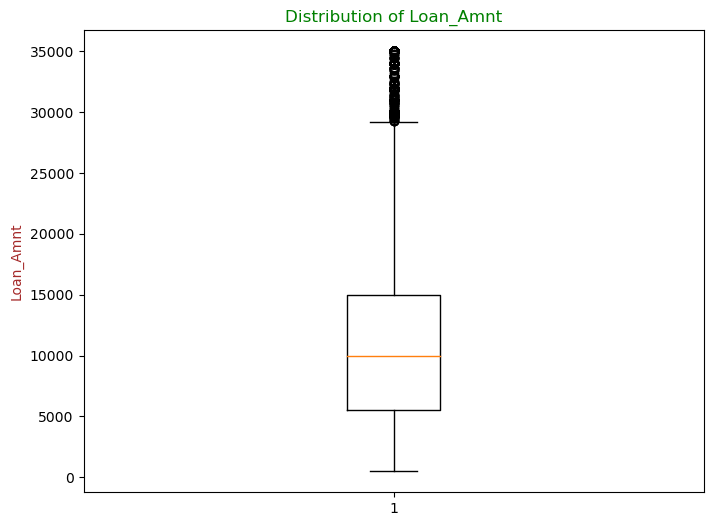

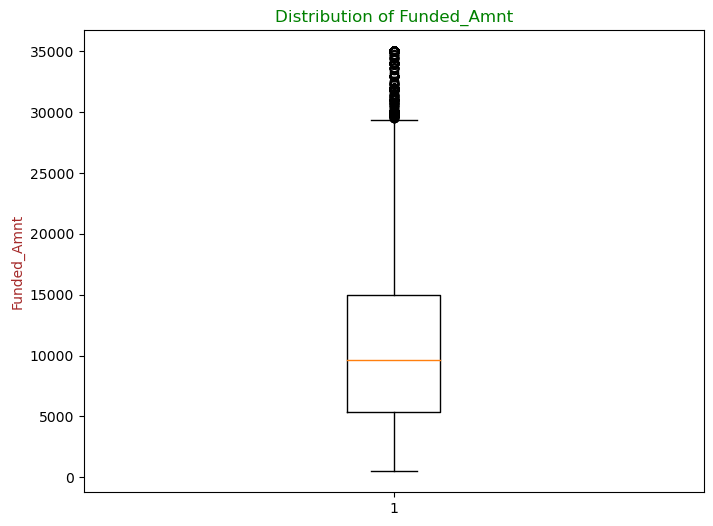

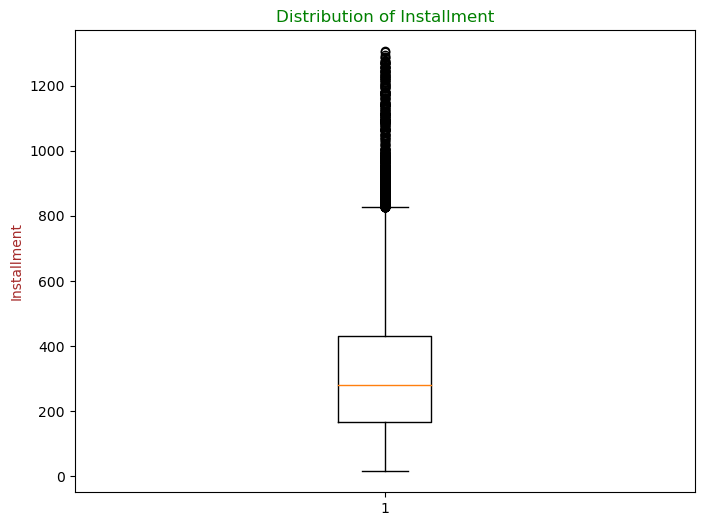

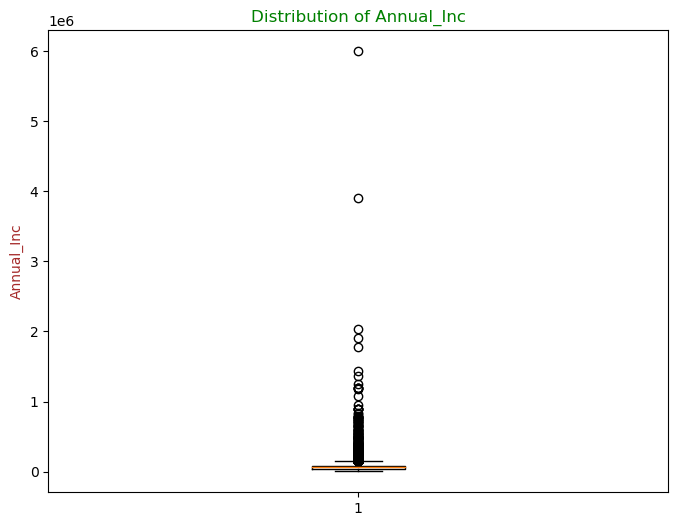

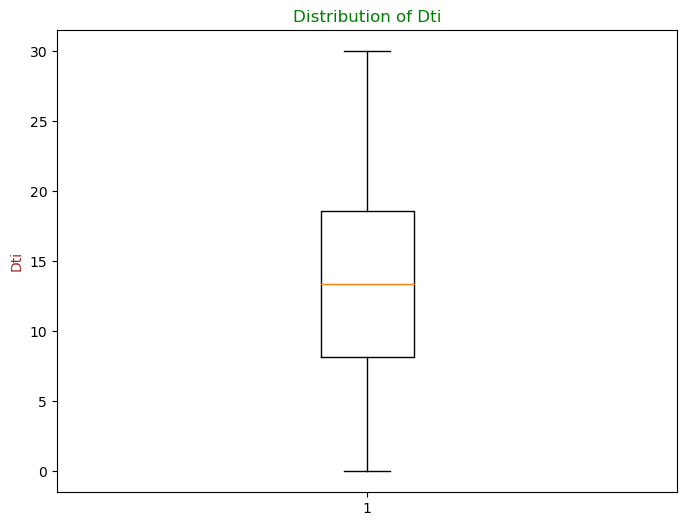

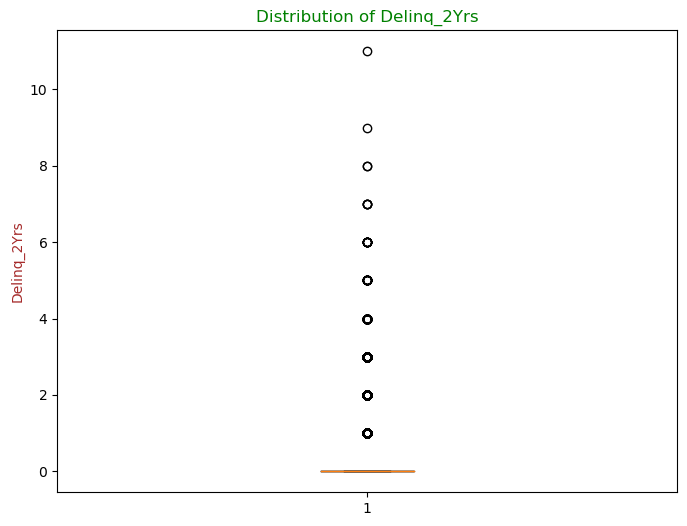

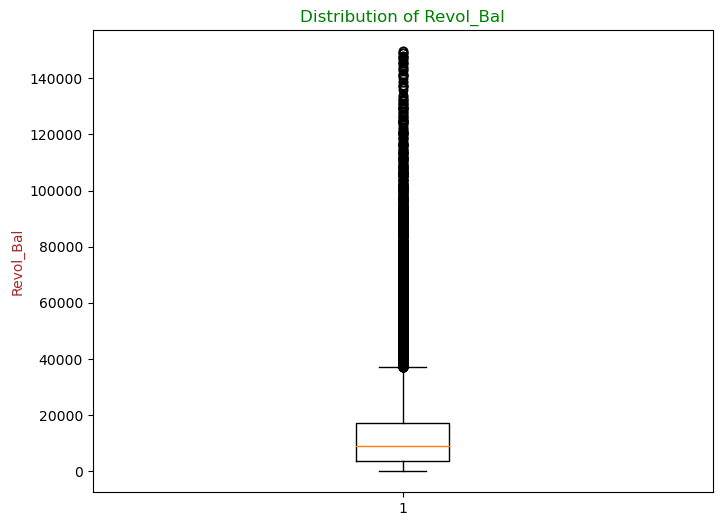

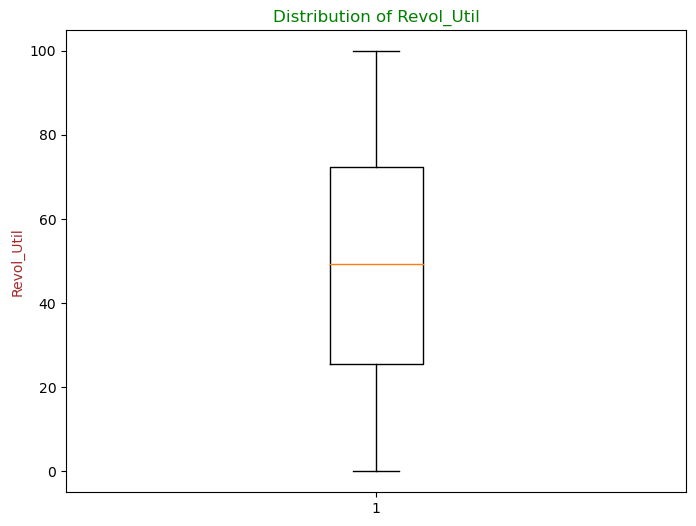

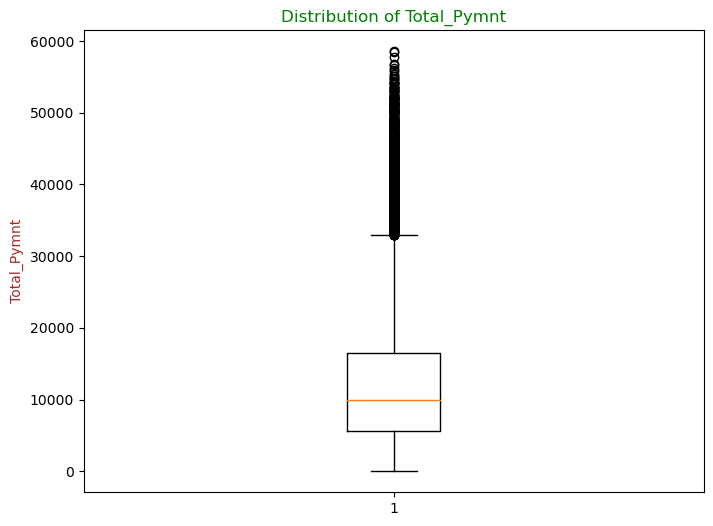

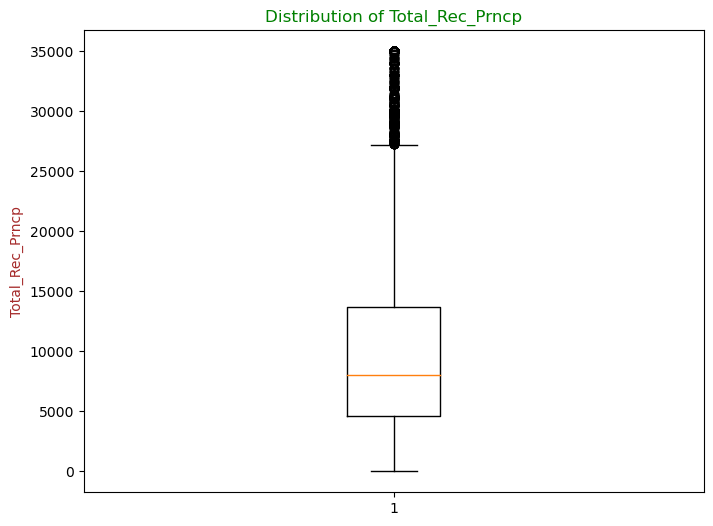

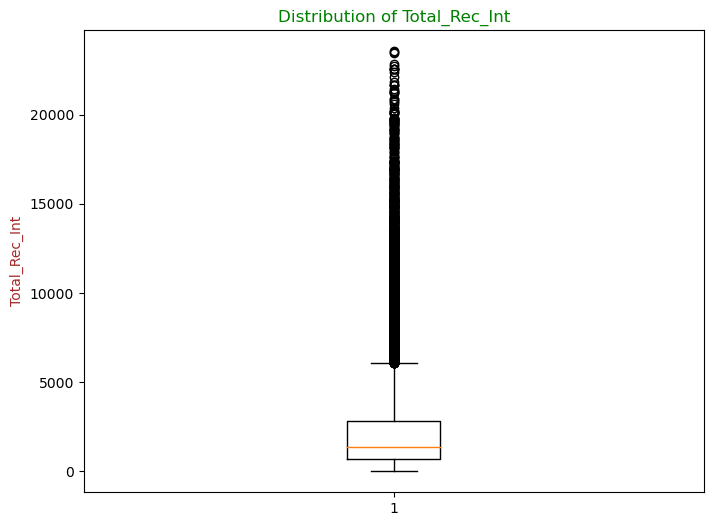

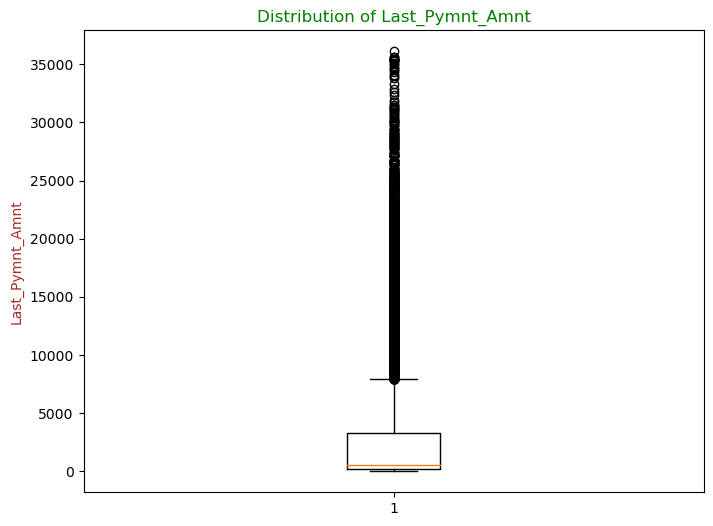

In [73]:
for column in essential_numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])

    plt.title(f"Distribution of {column.title()}", color="green")
    plt.ylabel(column.title(), color="brown")

    plt.show()

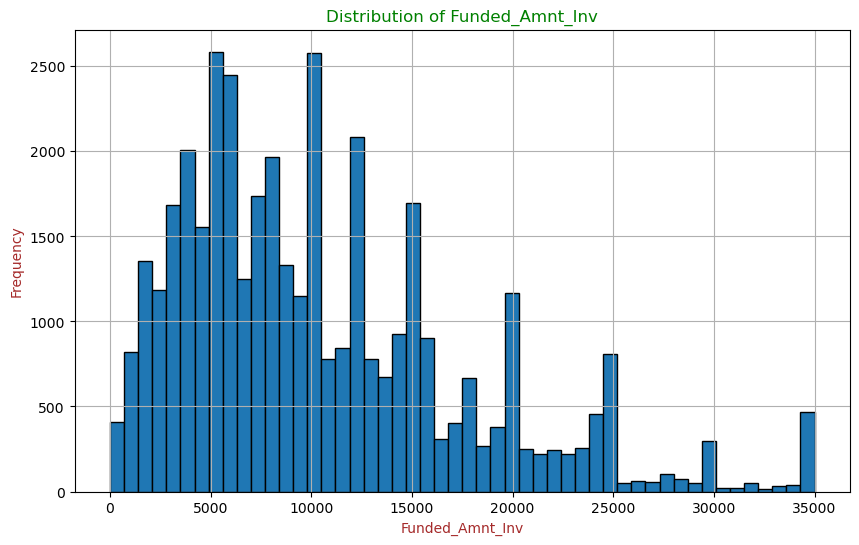

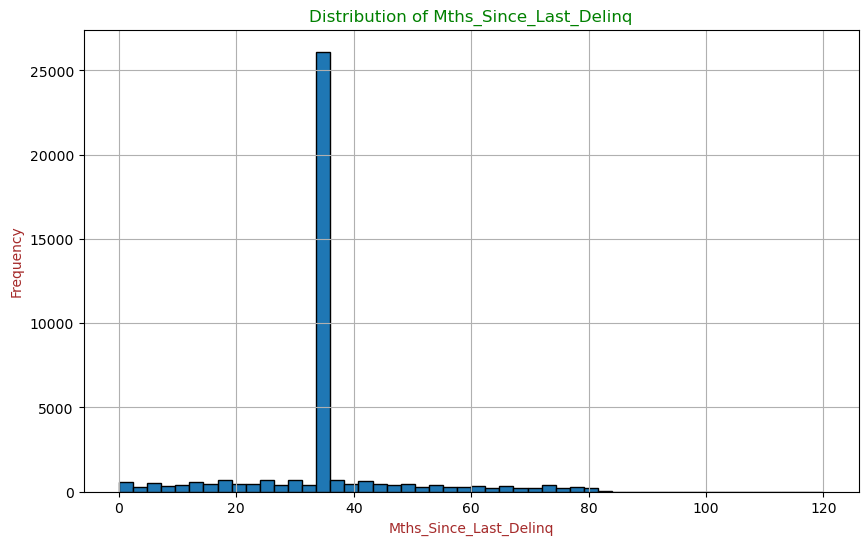

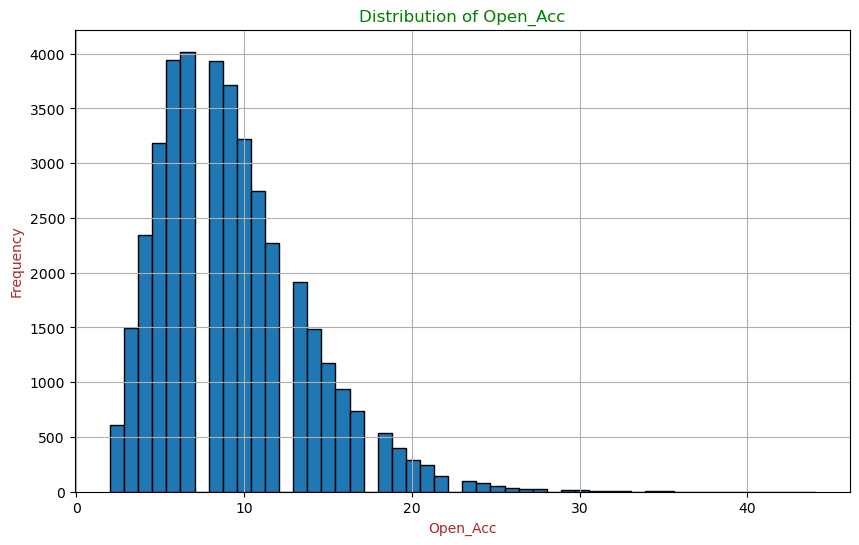

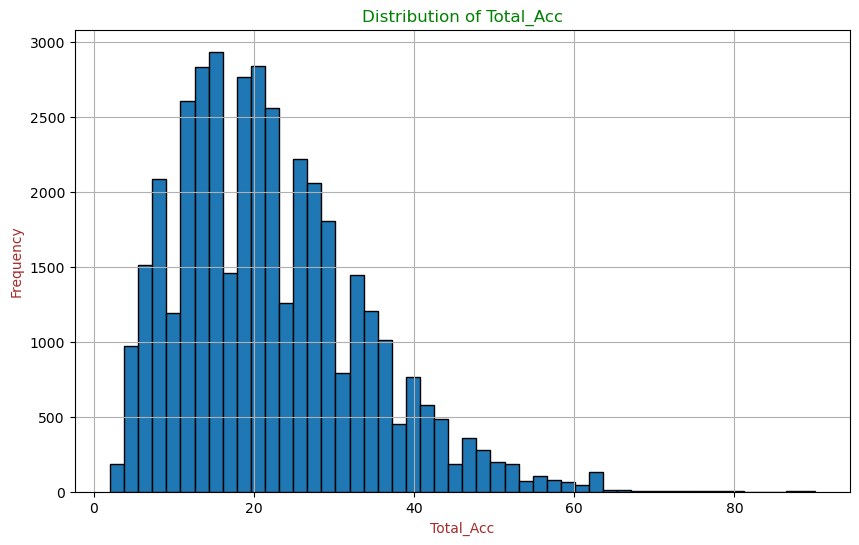

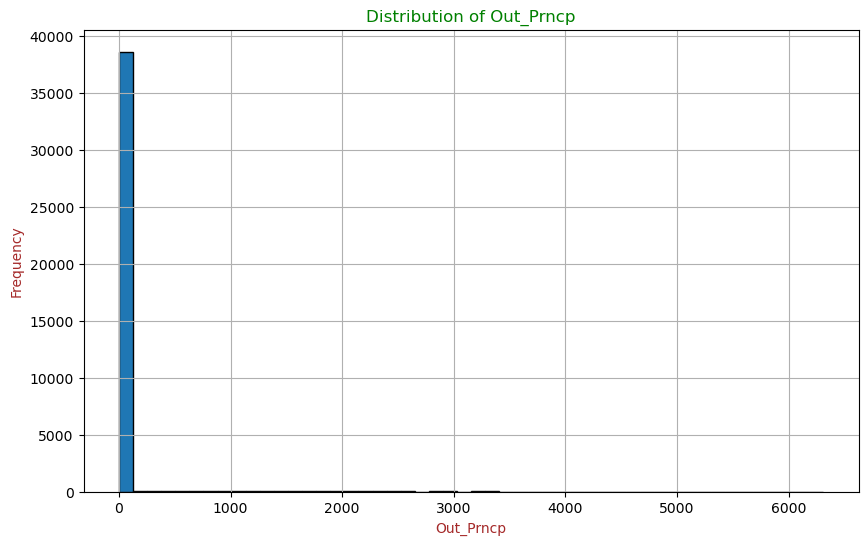

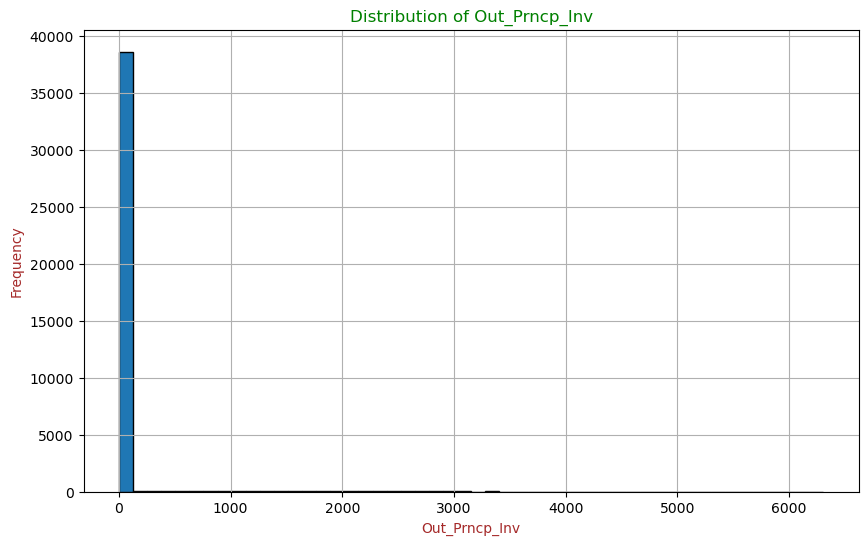

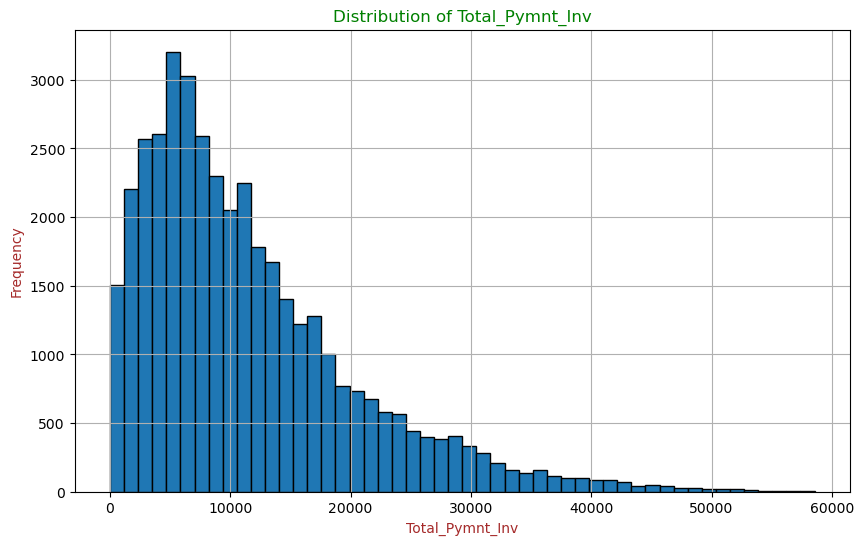

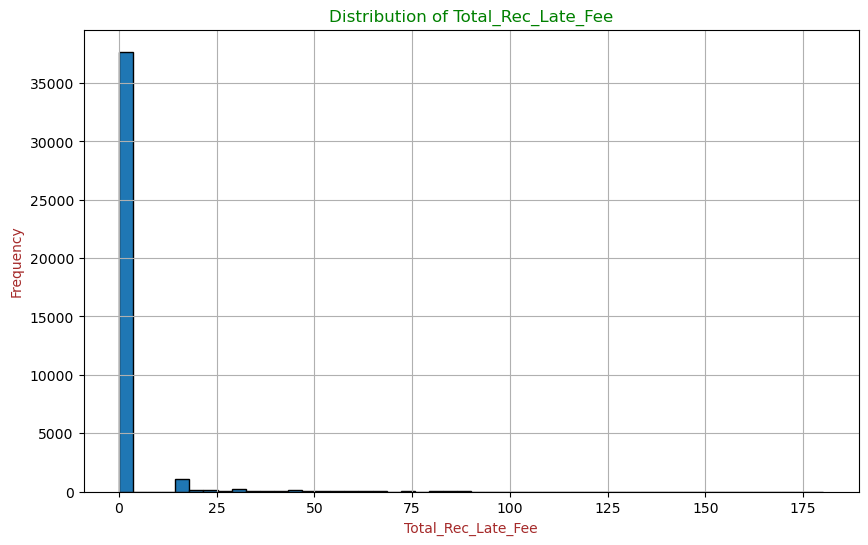

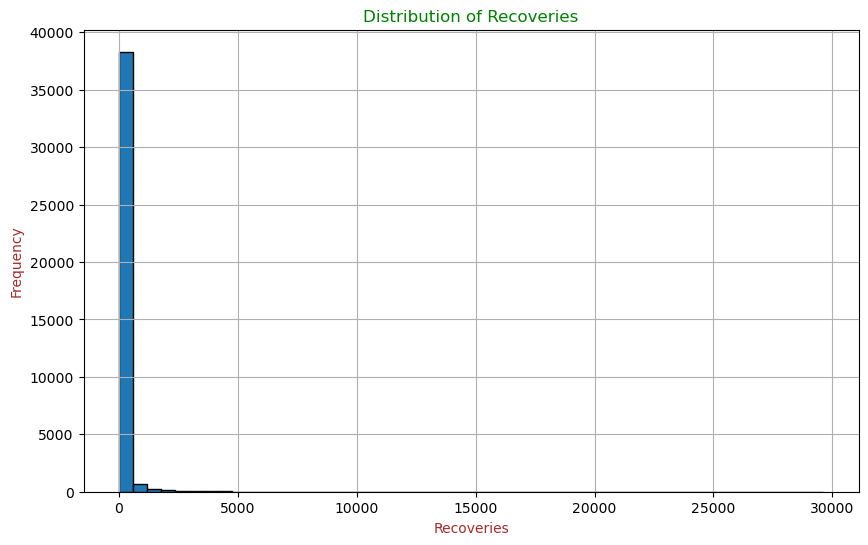

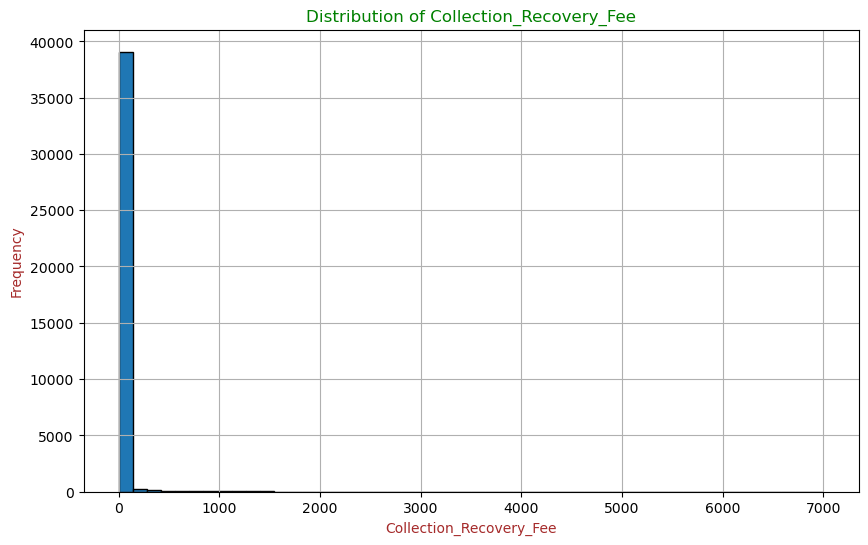

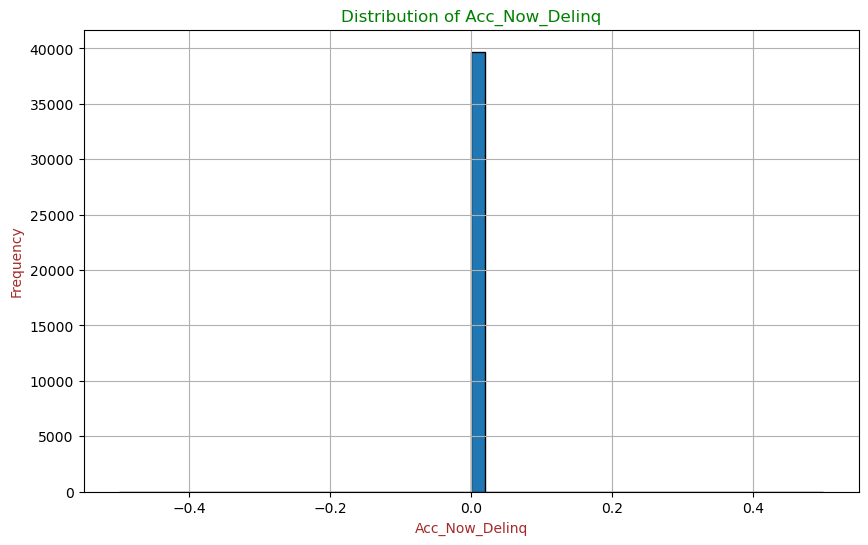

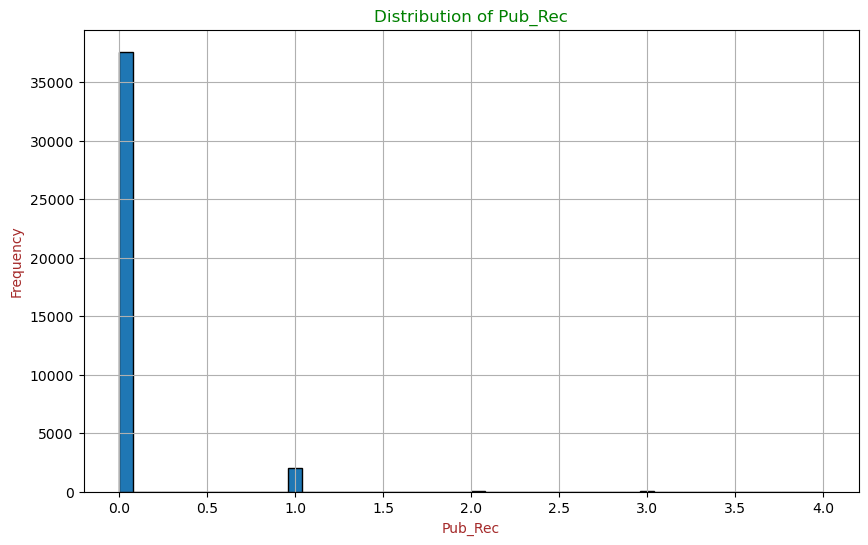

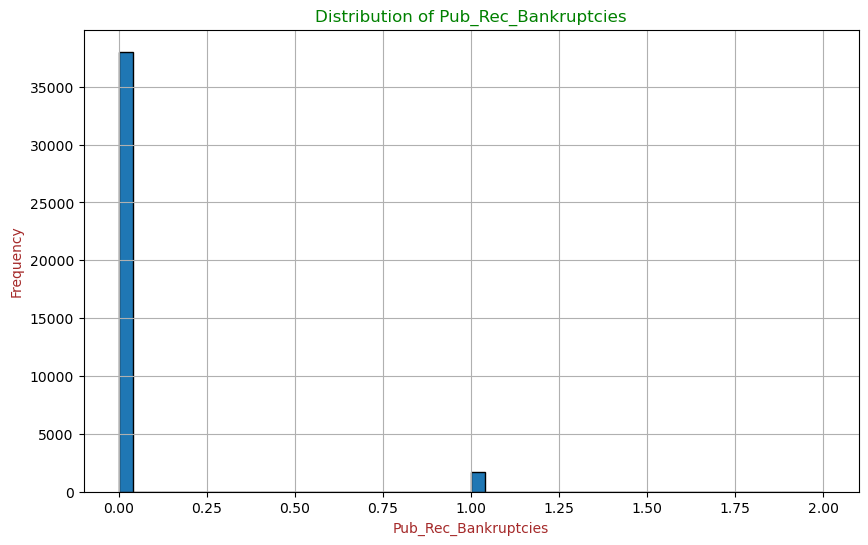

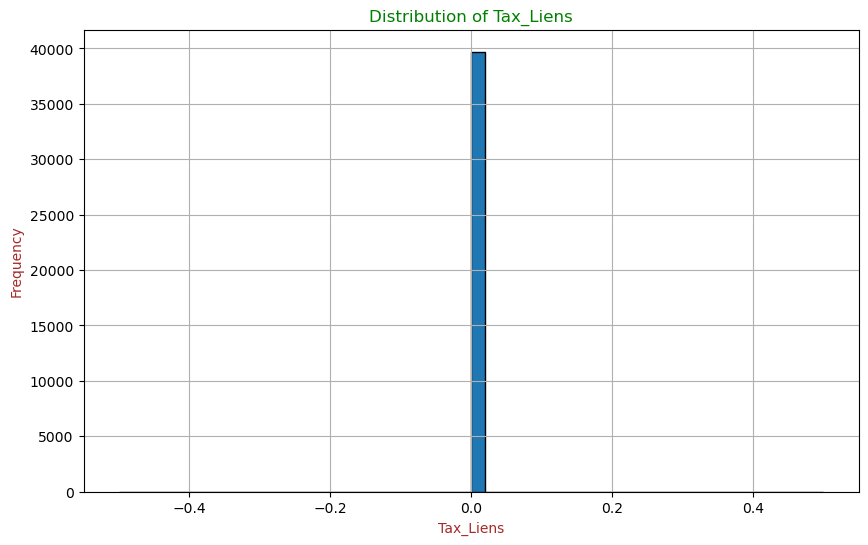

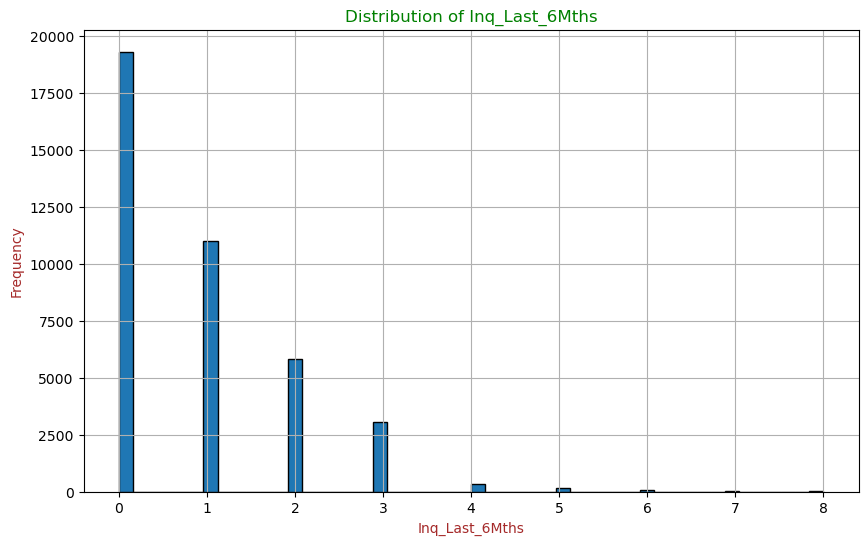

In [205]:
for column in contextual_numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=50, edgecolor='black')

    plt.title(f"Distribution of {column.title()}", color="green")
    plt.xlabel(column.title(), color="brown")
    plt.ylabel("Frequency", color="brown")
              
    plt.grid(True)

    plt.show()

- Distribution of Funded_Amnt_Inv
    - The histogram displays a gently right-skewed distribution, where the frequency of data points gradually increases, reaches a peak, and then slowly declines with some peaks towards the right .
    - Highest concentration of data points in in between 4000 to 11000.
- Distribution of number of months since the borrowers last delinquency   
    - The histogram displays symmetrical distribution
    - Peak is at 35
- Distribution of Open Accounts
    - The histogram displays a gently right-skewed distribution, where the frequency of data points gradually increases, reaches a peak, and then slowly declines towards the right.
    - Highest concentration of data points in in between 5 to 8 open credit lines.
- Distribution of Total Accounts
    - The histogram displays a gently right-skewed distribution, where the frequency of data points gradually increases, reaches a peak, and then slowly declines towards the right.
    - Highest data concentration is between 18 to 21 credit lines
- Distribution of "Remaining outstanding principal for total amount funded" and "Remaining outstanding principal for portion of total amount funded by investors"
    - Has a single peak at 0
- Distribution of Total_Payment_Inv
    - The histogram displays a gently right-skewed distribution, where the frequency of data points gradually increases, reaches a peak, and then slowly declines towards the right
    - Highest concentration os between 0 to 10000
- Distribution of Public Recoreded Bankruptcy
    - Histogram display Bimodal peaks
    - There is high peak referring zero bankruptcy reported
- Distribution of Inquiry received last 6 months
    - The histogram displays a gently right-skewed distribution, where the frequency of data points gradually increases, reaches a peak, and then slowly declines towards the right.
    - Enquiry comes mostly in Jan


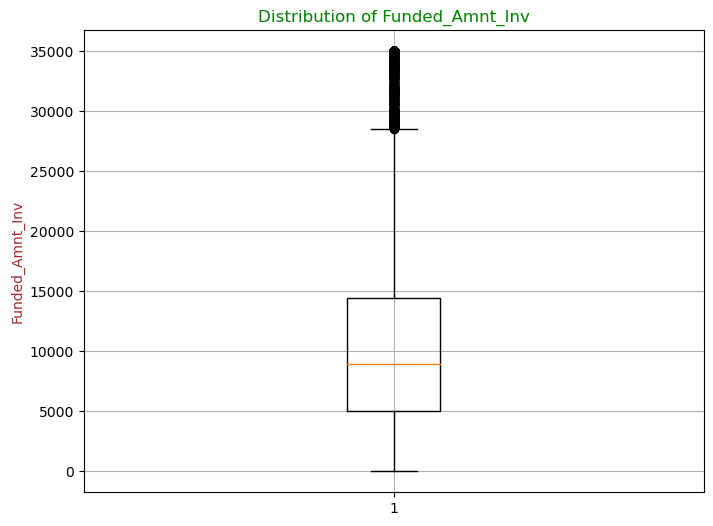

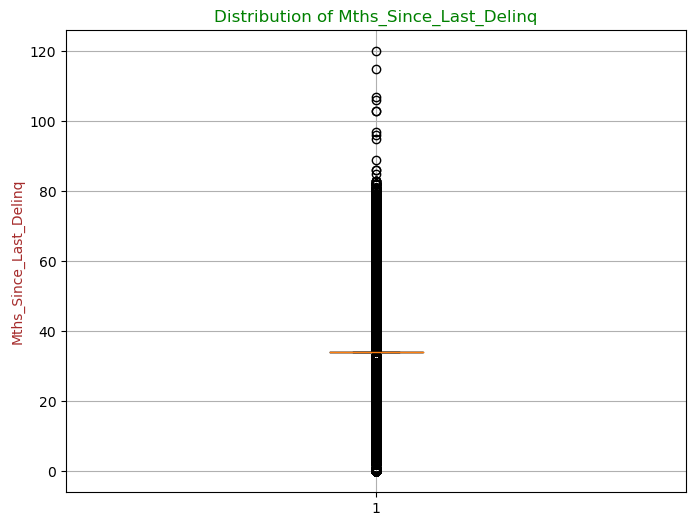

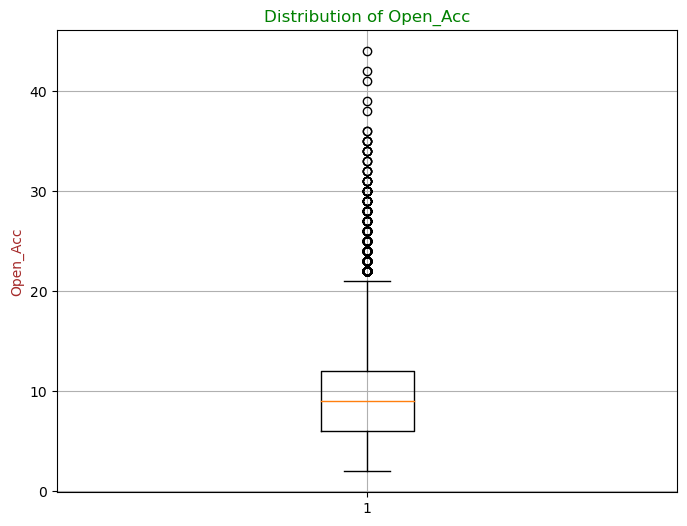

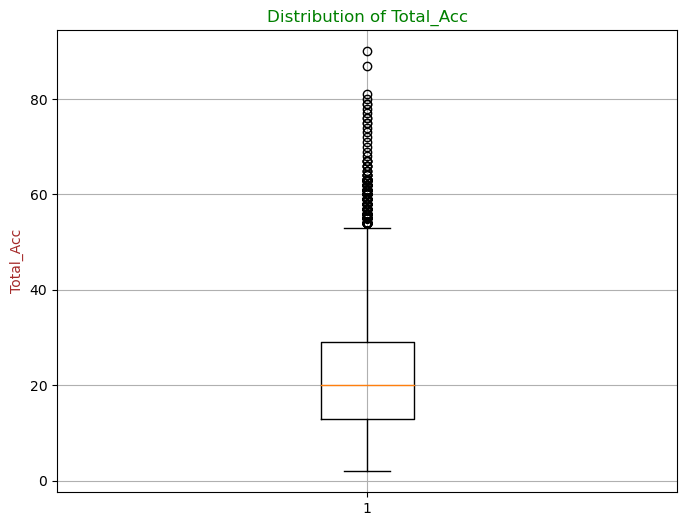

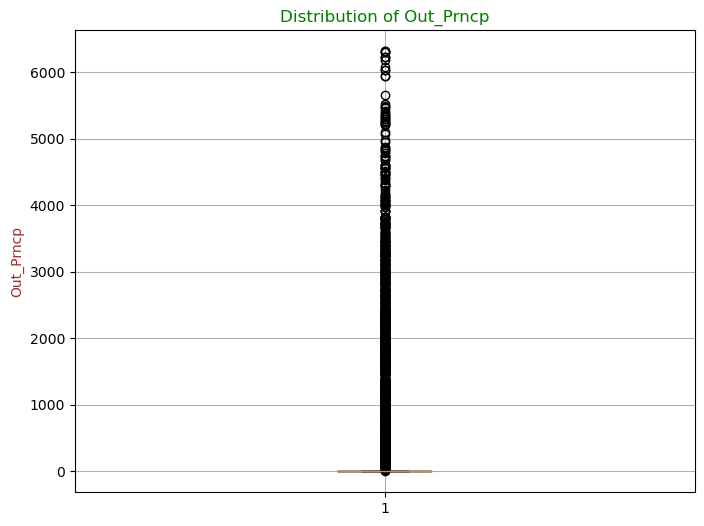

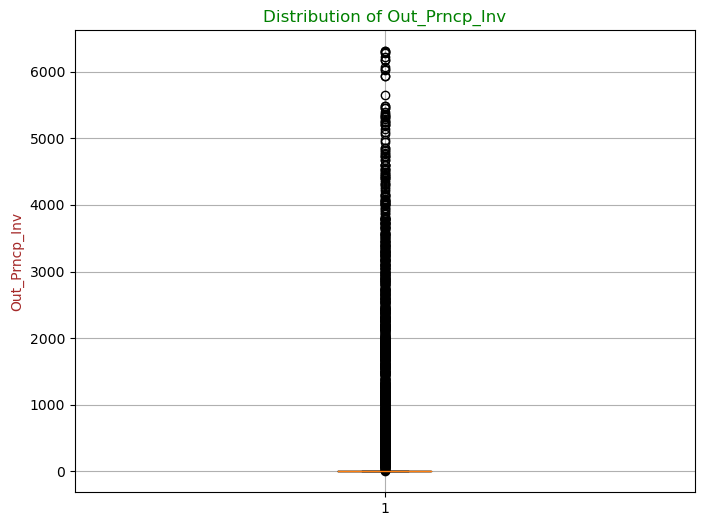

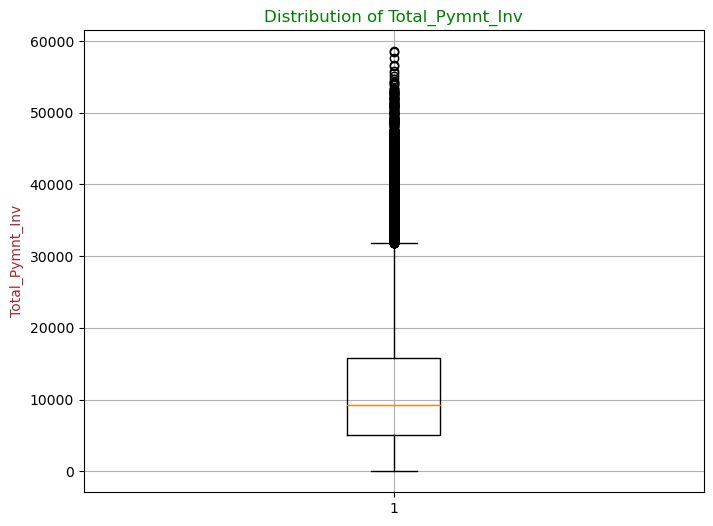

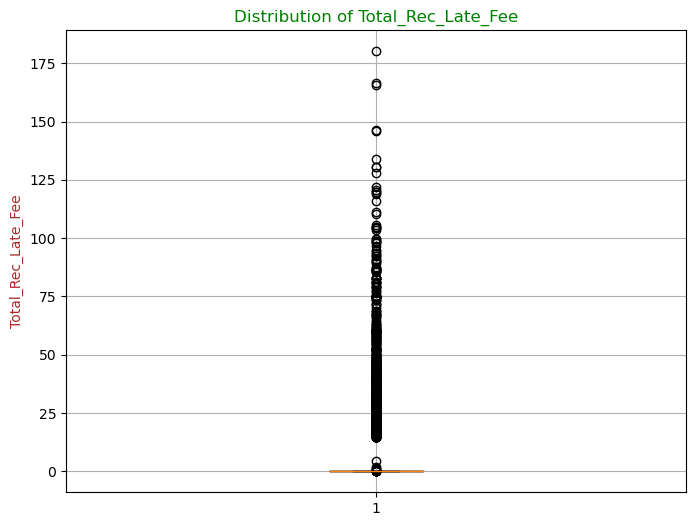

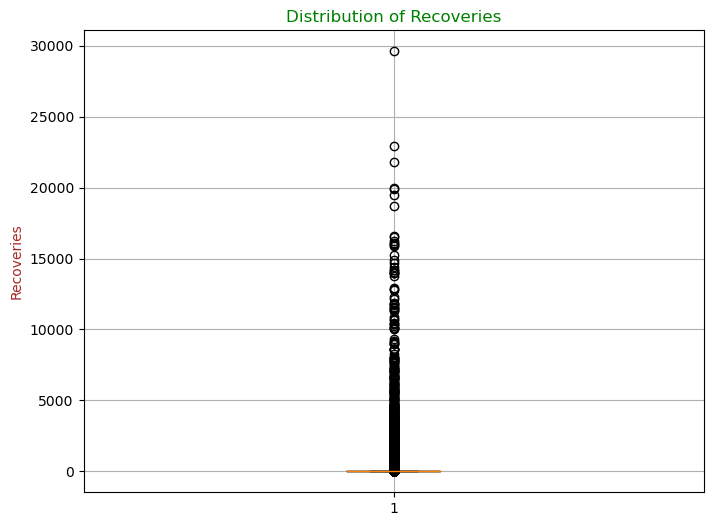

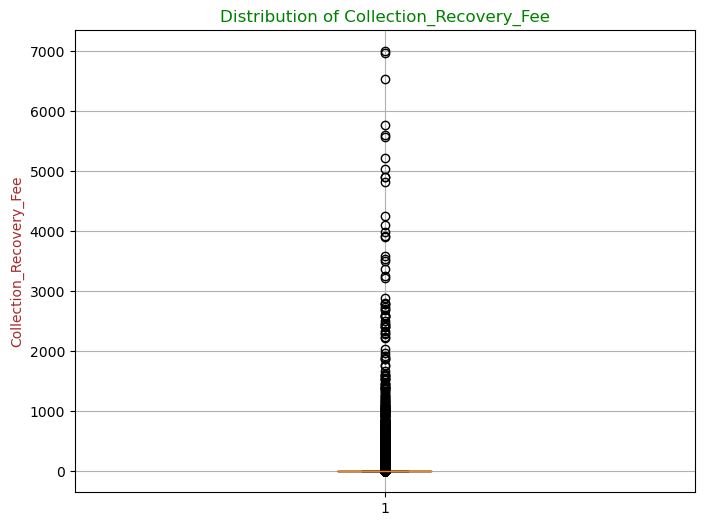

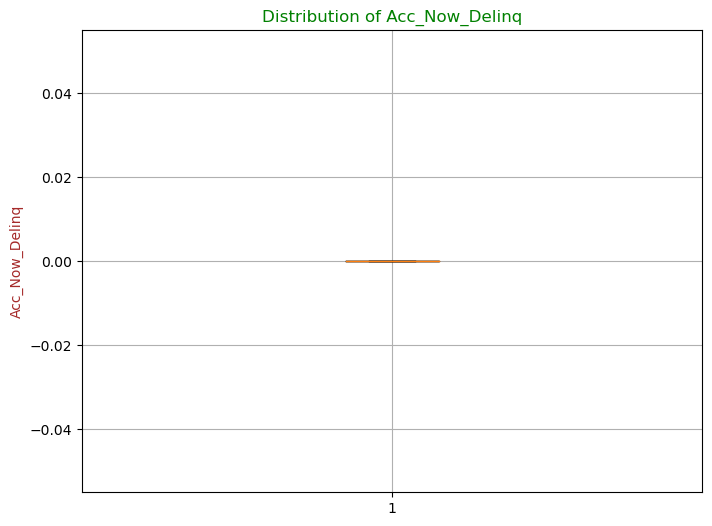

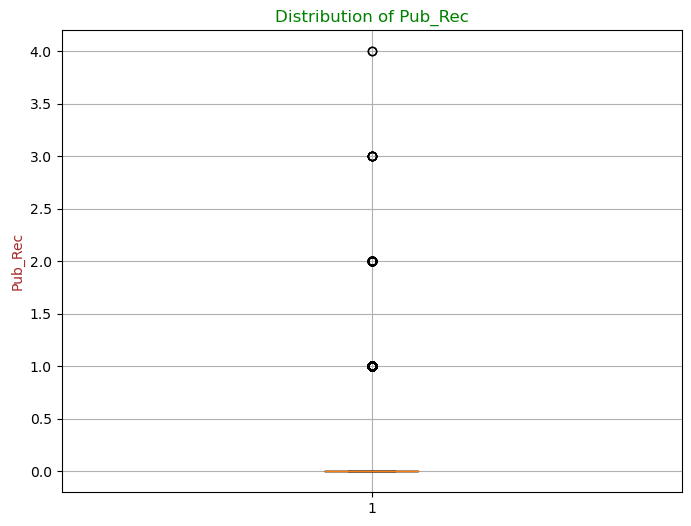

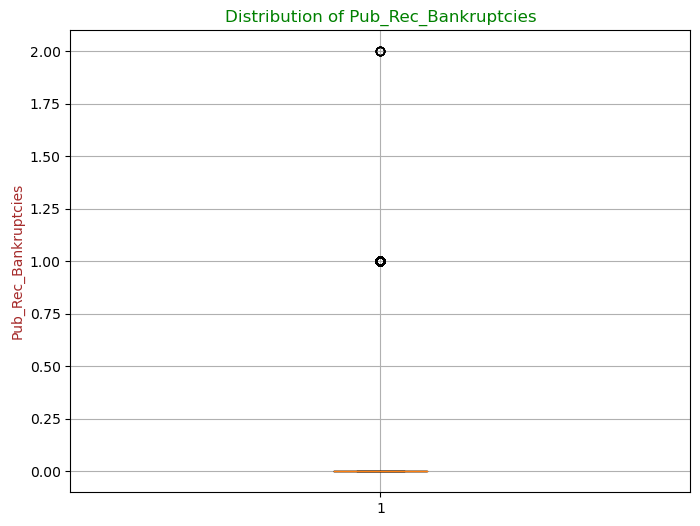

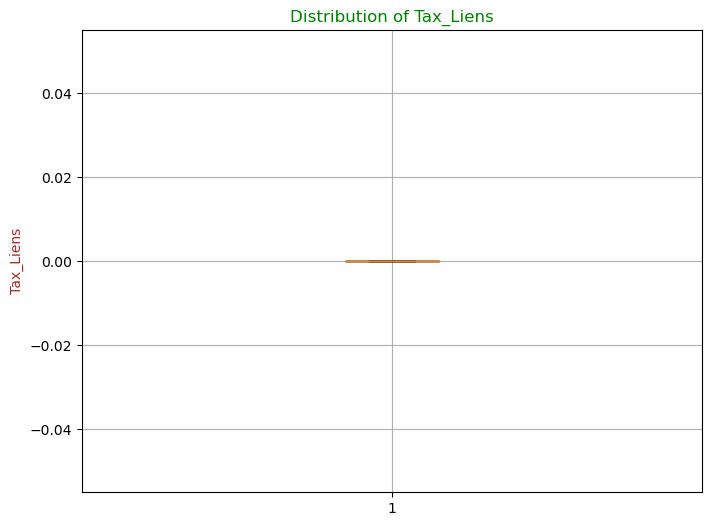

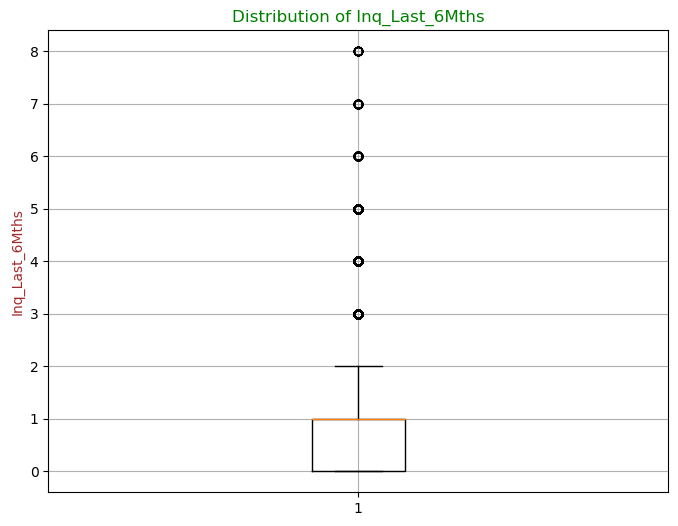

In [206]:
for column in contextual_numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])

    plt.title(f"Distribution of {column.title()}", color="green")
    plt.ylabel(column.title(), color="brown")

    plt.grid(True)
    
    plt.show()

- Distribution of Funded_Amnt_Inv
    - The box plot shows that the middle 50% of the data lies between 5,000 and 14,500, with a median value of 8,000, indicating that half of the data points fall below this value. The lower whisker extends to 0, suggesting that some values in the dataset are at or near zero, while the upper whisker reaches up to 28,000, capturing most of the higher values. However, there are a few outliers above 28,000, indicating some unusually high values that are significantly higher than the rest of the data.

- Distribution of Open Accounts
    - The box plot shows that the middle 50% of the data lies between 5 and 12, with a median value of 8, indicating that half of the data points fall below this value. The lower whisker extends to 2, while the upper whisker reaches up to 21, capturing most of the higher values. However, there are a few outliers above 21, indicating some unusually high values that are significantly higher than the rest of the data.
    
- Distribution of Total Accounts
    - The box plot shows that the middle 50% of the data lies between 11 and 35, with a median value of 20, indicating that half of the data points fall below this value. The lower whisker extends to 2, while the upper whisker reaches up to 21, capturing most of the higher values. However, there are a few outliers above 21, indicating some unusually high values that are significantly higher than the rest of the data.

- Distribution of Total_Payment_Inv
    - The box plot shows that the middle 50% of the data lies between 500 and 15,000, with a median value of 9,000, indicating that half of the data points fall below this value. The lower whisker extends to 0, suggesting that some values in the dataset are at or near zero, while the upper whisker reaches up to 31,000, capturing most of the higher values. However, there are a few outliers above 31,000, indicating some unusually high values that are significantly higher than the rest of the data.
    
- Distribution of Inquiry received last 6 months
    - The box plot shows that the middle 50% of the data lies between 0 and 1, with a median value of 1, indicating that half of the data points fall below this value. The lower whisker extends to 0, while the upper whisker reaches up to 2, capturing most of the higher values. However, there are a few outliers above 2, indicating some unusually high values that are significantly higher than the rest of the data.

# Segmented Univariate Analysis

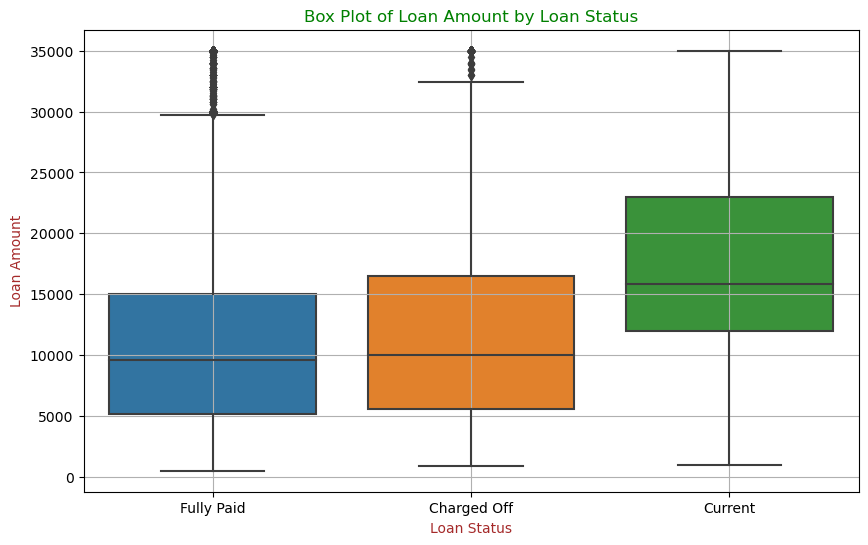

In [207]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

plt.title("Box Plot of Loan Amount by Loan Status", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Loan Amount", color="brown")

plt.grid(True)

plt.show()

- Median of Fully Paid and Charged off are almost same with upper whisker of chared off at a higher end.
- There are few outliers on higher end for both Fully Paid and Charged off, that means some have taken higher loans.
- People whose loans are active i.e Current Loan Status have normally took loan slightly over 15,000 with max loan amount as 35,000.


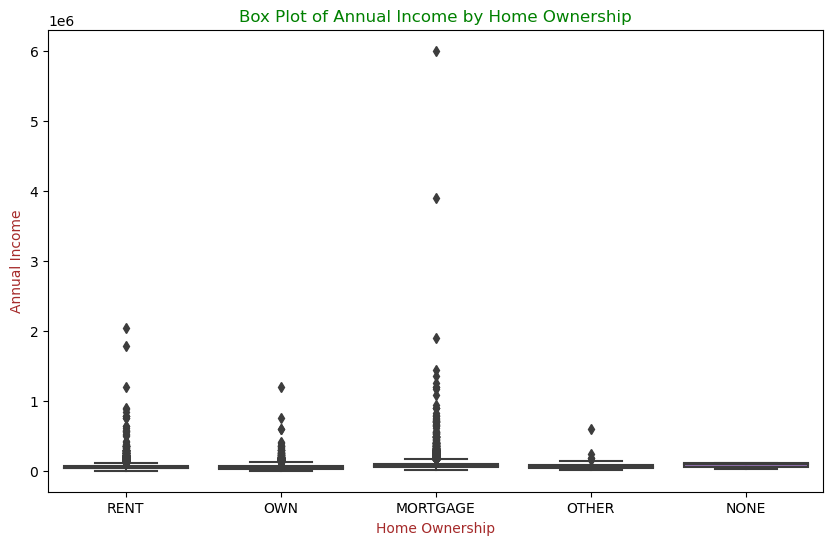

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="home_ownership", y="annual_inc", data=df)

plt.title("Box Plot of Annual Income by Home Ownership", color="green")
plt.xlabel("Home Ownership", color="brown")
plt.ylabel("Annual Income", color="brown")


plt.show()

> Analyzing this will be diffcult since all falls as a single line. So to analyze this Annual Income needs to be coverted to logarithm to check the spread.

#### Since value is to crowded converting annual_inc to log

To decode the same we will use numpy np.exp(\<log value\>) - 1

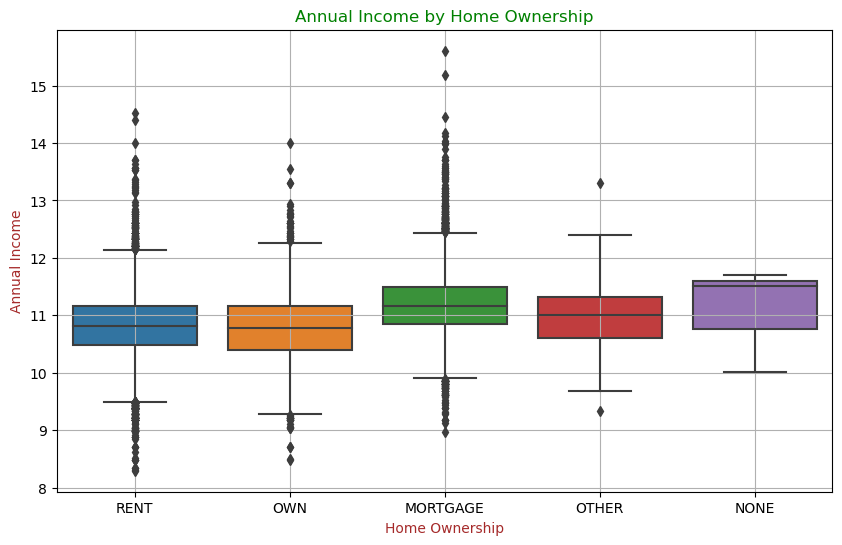

In [209]:
df["annual_inc_amnt"] = np.log(df["annual_inc"] + 1)  # Adding 1 to avoid log(0)

plt.figure(figsize=(10, 6))
sns.boxplot(x="home_ownership", y="annual_inc_amnt", data=df)

plt.title("Annual Income by Home Ownership", color="green")
plt.xlabel("Home Ownership", color="brown")
plt.ylabel("Annual Income", color="brown")

plt.grid(True)

plt.show()

- Individuals with a mortgage generally have higher annual incomes compared to those with other types of home ownership.
- The income distribution for those who rent and those who own their homes is nearly identical.

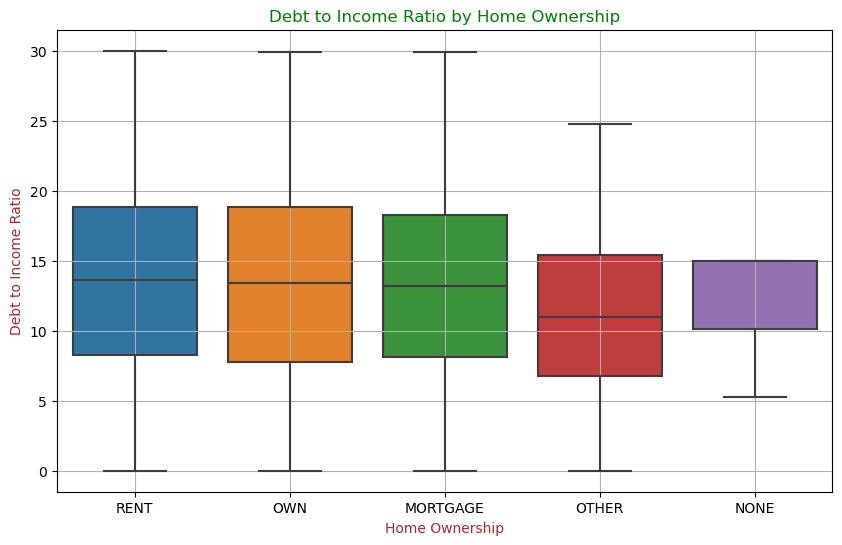

In [210]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="home_ownership", y="dti", data=df)

plt.title("Debt to Income Ratio by Home Ownership", color="green")
plt.xlabel("Home Ownership", color="brown")
plt.ylabel("Debt to Income Ratio", color="brown")

plt.grid(True)

plt.show()

- The debt-to-income ratio is nearly identical across RENT, OWN, and MORTGAGE categories, with a median around 14.
- Individuals with "Others" home ownership have a lower debt-to-income ratio.

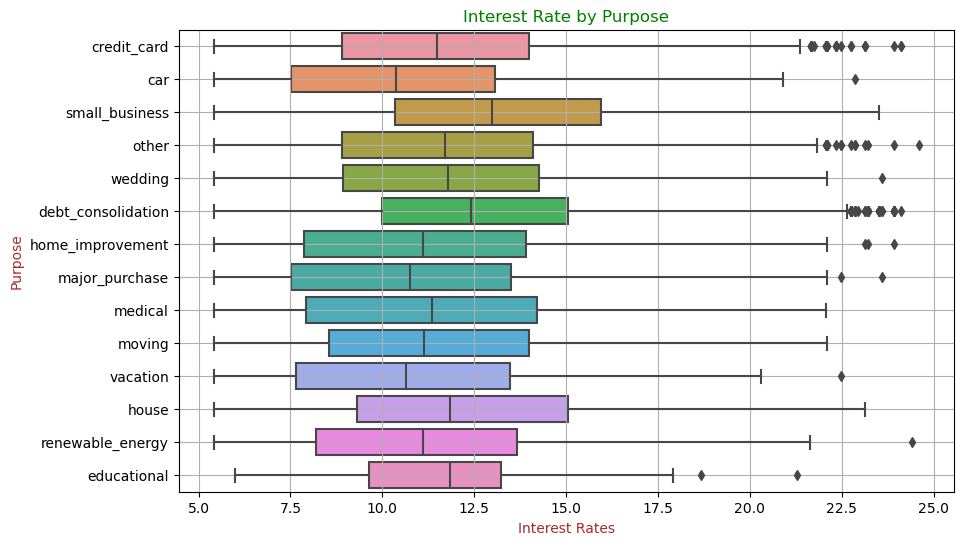

In [213]:
plt.figure(figsize=(10, 6))
sns.boxplot( x="int_rate", y="purpose", data=df)

plt.title("Interest Rate by Purpose", color="green")
plt.xlabel('Interest Rates', color="brown")
plt.ylabel('Purpose', color="brown")

plt.grid(True)

plt.show()

- Small businesses are paying the highest interest rates, with a median slightly above 12.5%.
- Car loan borrowers pay the lowest interest rates, with the median slightly above 10%.

# Bivariate Analysis

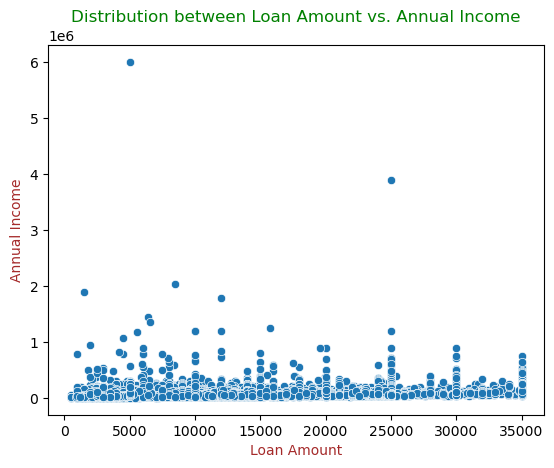

In [152]:
sns.scatterplot(x='loan_amnt', y='annual_inc', data=df)
plt.title('Distribution between Loan Amount vs. Annual Income', color="green")
plt.xlabel('Loan Amount', color="brown")
plt.ylabel('Annual Income', color="brown")
plt.show()

> Stating anything is difficult looking at this visualization, so lets break annual income into bins

In [108]:
df.annual_inc.min()

4000.0

In [107]:
df.annual_inc.max()

6000000.0

In [140]:
bins = [4000, 10000, 50000, 100000, 500000, 1000000, 6000000]

# Define labels for the bins
labels = ["4k-10k", "10k-50k", "50k-100k", "100k-500k", "500k-1M", "1M-6M"]

# Create a new column 'annual_inc_category' with the annual income categories
df["annual_inc_category"] = pd.cut(df["annual_inc"], bins=bins, labels=labels, include_lowest=True)


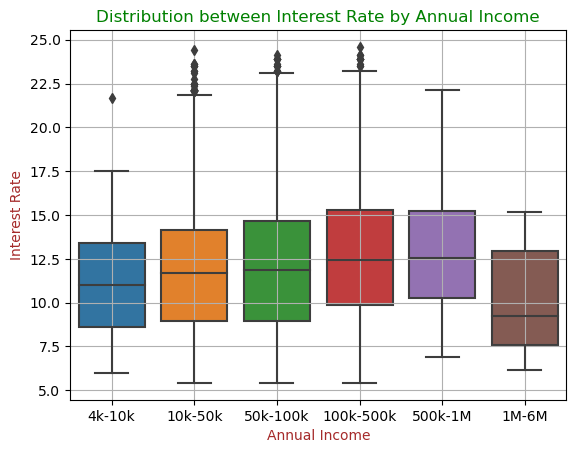

In [215]:
sns.boxplot(x="annual_inc_category", y="int_rate", data=df)

plt.title("Distribution between Interest Rate by Annual Income", color="green")
plt.xlabel("Annual Income", color="brown")
plt.ylabel("Interest Rate", color="brown")

plt.grid(True)

plt.show()

- Individuals with annual incomes between 100k-500k and 500k-1M are paying the highest interest rates, with a median of 12.5%.
- Those earning between 1M-6M pay lower interest rates, with a median below 10%.

In [150]:
df.loan_amnt.value_counts().sort_index()

loan_amnt
500        5
700        1
725        1
750        1
800        1
        ... 
34475      5
34525      1
34675      1
34800      2
35000    679
Name: count, Length: 885, dtype: int64

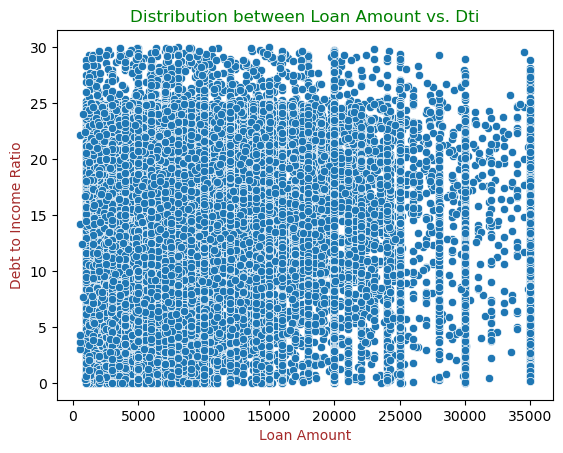

In [216]:
sns.scatterplot(x="loan_amnt", y="dti", data=df)
plt.title("Distribution between Loan Amount vs. Dti", color="green")
plt.xlabel("Loan Amount", color="brown")
plt.ylabel("Debt to Income Ratio", color="brown")
plt.show()

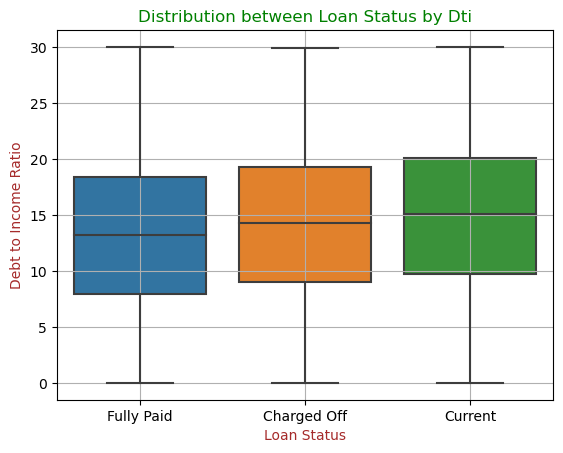

In [217]:
sns.boxplot(x="loan_status", y="dti", data=df)

plt.title("Distribution between Loan Status by Dti", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Debt to Income Ratio", color="brown")

plt.grid(True)

plt.show()

- Individuals with active or current loans have a slightly higher debt-to-income (DTI) ratio, around 15.
- Those with fully paid loans have the lowest DTI, ranging between 10 and 15.

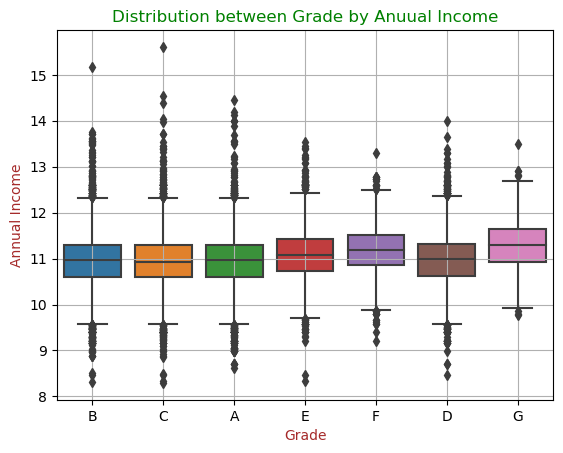

In [166]:
sns.boxplot(x="grade", y="annual_inc_amnt", data=df)

plt.title("Distribution between Grade by Anuual Income", color="green")
plt.xlabel("Grade", color="brown")
plt.ylabel("Annual Income", color="brown")

plt.grid(True)

plt.show()

- Grade G are literally has a higher annual income with median between 11 to 12.
- Grade A, B, C, D has lowest annual income with median 11.

# Multivariate Analysis

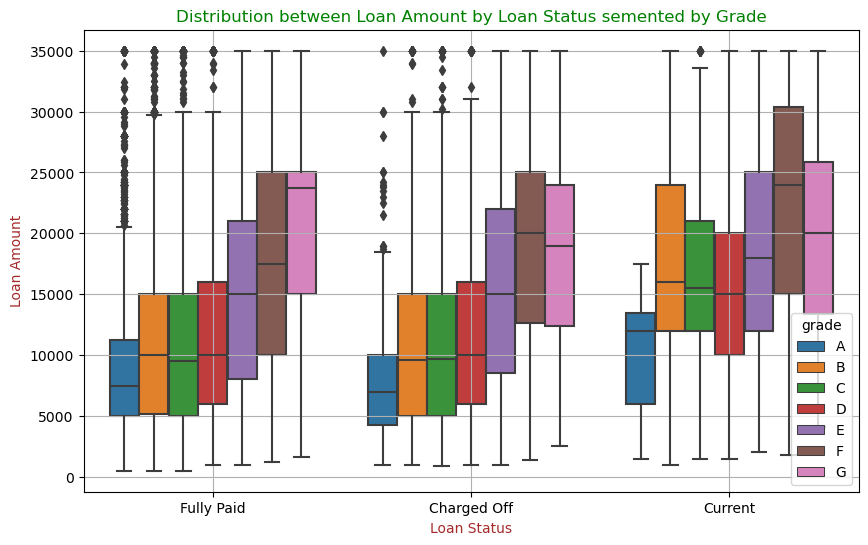

In [173]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="loan_status", y="loan_amnt", hue="grade", hue_order=["A", "B", "C", "D", "E", "F", "G"], data=df)

plt.title("Distribution between Loan Amount by Loan Status semented by Grade", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Loan Amount", color="brown")

plt.grid(True)

plt.show()

- Loan Grade "A" consistently represents the lowest loan amounts across all loan statuses.
- Highest Loan Amount
    - For Fully Paid loans, the highest amounts were from Grade G, with a median just under 25,000..
    - For Charged Off loans, the highest amounts were from Grade F, with a median of 20,000.
    - For Current loans, the highest amounts were also from Grade F, with a median slightly below 25,000.

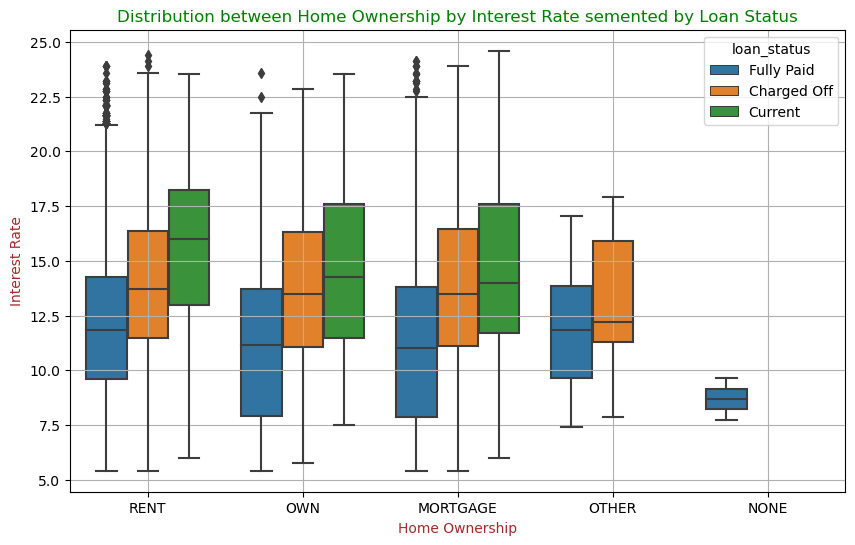

In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="home_ownership", y="int_rate", hue="loan_status", data=df)

plt.title("Distribution between Home Ownership by Interest Rate semented by Loan Status", color="green")
plt.xlabel("Home Ownership", color="brown")
plt.ylabel("Interest Rate", color="brown")

plt.grid(True)

plt.show()

- Excluding "Other" and "None" home ownership categories
    - Individuals with current loans are paying the highest interest rates.
    - The interest rate trend increases from Fully Paid to Charged Off to Current loans.
- Those with Fully Paid loans experienced the lowest interest rates.


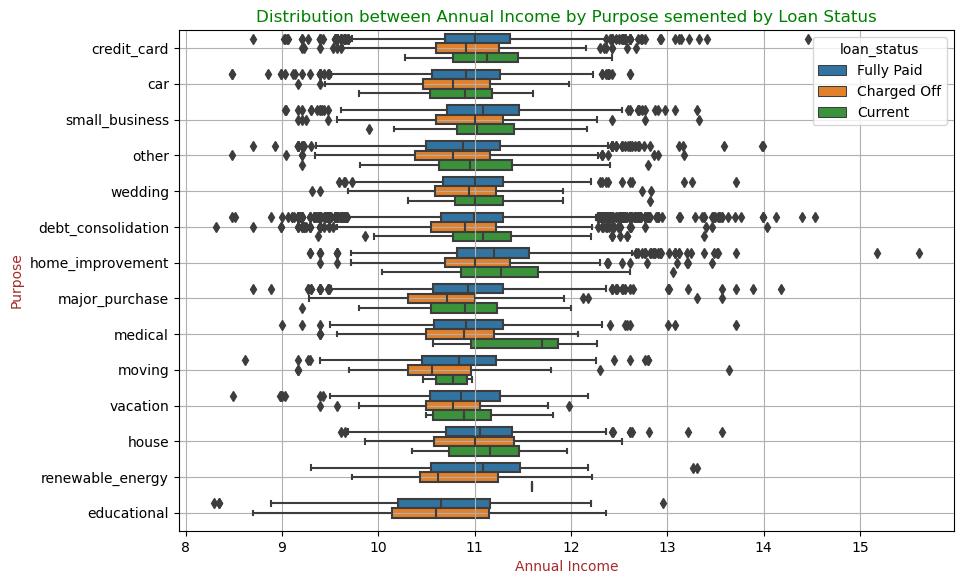

In [188]:
plt.figure(figsize=(10, 6.5))
sns.boxplot(x="annual_inc_amnt", y="purpose", hue="loan_status", data=df)

plt.title("Distribution between Annual Income by Purpose semented by Loan Status', color="green")
plt.xlabel('Annual Income', color="brown")
plt.ylabel('Purpose', color="brown")

plt.grid(True)

plt.show()

1. Similar Incomes Across Loan Types:

- For most reasons people take out loans, like buying a car or doing home improvements, people’s incomes are pretty similar whether they’ve paid off the loan, are still paying it, or didn’t pay it back.

2. Small Business Loans:

- People who took out loans for small businesses have a wide range of incomes. Some earn a lot, and some earn much less, especially among those still paying off their loans.

3. Medical Loans:

- People borrowing for medical expenses generally have similar incomes, with not much difference between those who have paid off the loan and those who haven’t.

4. Educational Loans:

- Those taking out loans for education tend to have lower incomes compared to other types of loans.

5. House Loans:

- People borrowing money to buy a house usually have higher incomes, and most of them fall within a similar income range.

6. Renewable Energy Loans:

- Loans for things like solar panels show a wide range of incomes, meaning that people with both low and high incomes are taking out these loans.

7. Current Loans:

- People who are still paying off their loans, especially for things like small businesses or home improvement, have incomes that vary a lot, from lower to much higher.

8. Outliers:

- In every loan category, there are a few people with incomes that are much higher or lower than everyone else, particularly in areas like credit cards, small businesses, and big purchases.

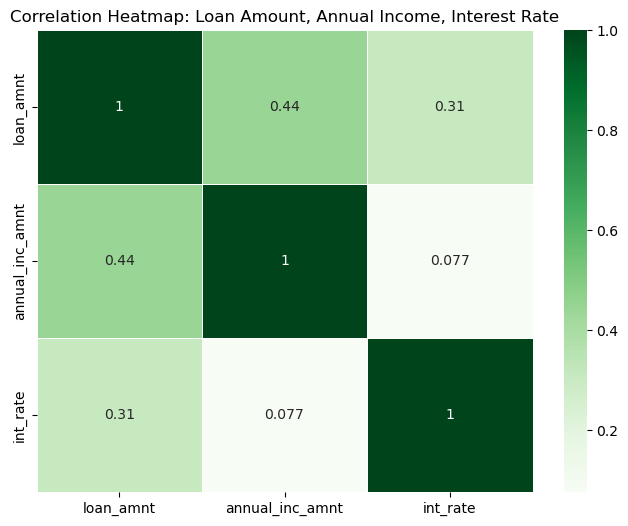

In [194]:
corr_matrix = df[['loan_amnt', 'annual_inc_amnt', 'int_rate']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5)

# Adding title and adjusting labels
plt.title('Correlation Heatmap: Loan Amount, Annual Income, Interest Rate')
plt.show()

This heatmap shows how three things are related to each other: the loan amount, the borrower's annual income, and the interest rate they’re charged.

1. Loan Amount vs. Annual Income:

- There’s a moderate positive relationship between the loan amount and annual income (0.44). This means that generally, people with higher incomes tend to take out larger loans, but it's not a strong link.

2. Loan Amount vs. Interest Rate:

- There’s a weaker positive relationship between the loan amount and the interest rate (0.31). This indicates that as the loan amount increases, the interest rate also slightly increases, but this connection is not very strong.

3. Annual Income vs. Interest Rate:

- The weakest relationship is between annual income and interest rate (0.077). This suggests that the amount a person earns has very little impact on the interest rate they receive for their loan.

In simple terms, people with higher incomes tend to borrow more, and bigger loans might have slightly higher interest rates. However, how much someone earns doesn’t really affect the interest rate they’re charged

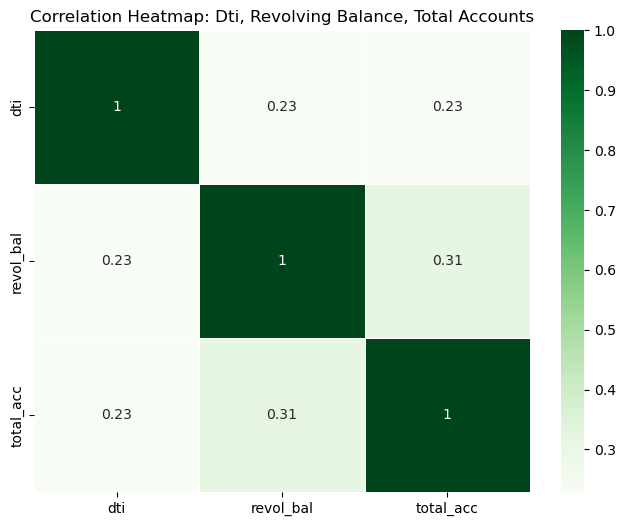

In [195]:
corr_matrix = df[['dti', 'revol_bal', 'total_acc']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5)

# Adding title and adjusting labels
plt.title('Correlation Heatmap: Dti, Revolving Balance, Total Accounts')
plt.show()

This heatmap shows how three financial factors are related to each other: a person's debt-to-income ratio (DTI), their total revolving balance (revol_bal), and the total number of credit accounts they have (total_acc).

1. Debt-to-Income Ratio (DTI) vs. Revolving Balance & Total Accounts:

- There’s a weak positive relationship between DTI and both revolving balance (0.23) and total accounts (0.23). This means that as a person's DTI increases, their revolving balance and total accounts also increase slightly, but the connection is not very strong.

2. Revolving Balance vs. Total Accounts:

- There’s a slightly stronger relationship between revolving balance and total accounts (0.31). This suggests that people who have more credit accounts tend to have higher revolving balances, but again, the relationship isn't particularly strong.

In simple terms, if someone has more credit accounts, they’re likely to have a slightly higher revolving balance. However, their DTI is not strongly linked to either their revolving balance or the number of accounts they have.

In [222]:
import matplotlib
print(sns.__version__)

0.12.2
